## Class Imbalance Handling Bank Data:

In [ ]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score,f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.impute import KNNImputer


from sklearn.decomposition import PCA




## **Making important functions**<br>
- 1-Function for Data Collection
- 2-Getting major details of data
- 3-Investigating Target Coulmn
- 4-Investigating Categorical Columns
- 5-Label Encoding and One hot encoding
- 6-Handling Class imbalance
- 7-Function for data Cleaning
- 8-EDA
- 9-Transformation
- 10-Feature Selection
- 11- Dimensionality Reduction
- 12- Storing results in a dataframe.
- 13- ML Algorithm

### **1- Function for Data Collection:**
Thisfunction will collect the data by giving the location of dataset using following format.<br>
Loc= r'G:\USB data\IBA\IBA PhD\Course Work\Machine Learnin1\WIDS_Datathon_2024#1\New Folder\training.csv'


In [ ]:
import pandas as pd

def import_dataset(file_path):
    # Read the Excel file using Pandas read_excel function
    data = pd.read_excel(file_path)

    return data



### **2- Getting Major details of data**

In [ ]:
def description_dataset(df):

    desc = pd.DataFrame(index = list(df))
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc['min'] = df.min()
    desc['max'] = df.max()
    return desc


### **3- Investigating Target column:**

In [ ]:
# This function will print counts of each label with label values and you can use it to see the class balance. df=df['target']
def inv_target(df):
    unique_value_counts = df.value_counts().to_dict()
    print(unique_value_counts)
    return

### **4- Investigating Categorical columns:**

In [ ]:
def inv_cat(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df.select_dtypes(include=['object']).columns:
    # Print column name
        print(f"Column: {column}")

    # Unique values and their counts
        unique_values = df[column].value_counts()
        print("Unique values and their counts:")
        print(unique_values)

    # Number of null values
        null_values_count = df[column].isnull().sum()
        print(f"Number of null values: {null_values_count}")

    print("\n")
    return()



### **5- Label Encoding and One hot encoding:**

In [ ]:


def one_hot_encode(df, columns):

    # Generate one-hot encoding
    one_hot_df = pd.get_dummies(df, columns=columns, drop_first=True)

    # Delete original columns
    for col in columns:
        del one_hot_df[col]

    return one_hot_df

def encode_numerical_features(df):
    encoded_df = df.copy()
    label_encoders = {}  # Dictionary to store label encoders for each categorical feature

    categorical_features = df.select_dtypes(include='object').columns  # Extract column names

    for feature in categorical_features:
        if not pd.api.types.is_numeric_dtype(df[feature]):
            # Perform label encoding for categorical variables
            label_encoder = LabelEncoder()
            encoded_df[feature] = label_encoder.fit_transform(encoded_df[feature])

            # Store variable name along with category labels
            label_encoders[feature] = {category: label for label, category in enumerate(label_encoder.classes_)}

    # Print the label encoders
    for feature, encoding_mapping in label_encoders.items():
        print(f"Encoding mapping for {feature}:")
        for category, label in encoding_mapping.items():
            print(f"  {category} -> {label}")

    return encoded_df


### **6- Handling Class Imbalance:**

In [ ]:

def apply_smote(df, target_column_name):
    # Separate features and target variable
    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]

    # Instantiate SMOTE object
    smote = SMOTE(random_state=42)

    # Fit and transform the data
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Create a new DataFrame with resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)

    return df_resampled



def apply_adasyn(df, target_column_name):
    # Separate features and target variable
    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]

    # Instantiate ADASYN object
    adasyn = ADASYN(random_state=42)

    # Fit and transform the data
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    # Create a new DataFrame with resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)

    return df_resampled


# Assuming X and y are your features and target variable, respectively
def apply_undersampling(X,y):
    # Initialize RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)

    # Perform under-sampling
    X, y = undersampler.fit_resample(X, y)

    return X,y



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model

#Applying GAN at whole_data

# Split the dataset into features (X) and labels (y)
X = bank.drop(columns=['y'])
y = bank['y']

# Separate majority and minority classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Define the dimensionality of the latent space for the GAN
latent_dim = 100

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X.shape[1], activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, input_shape=(X.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Build and compile the GAN
generator = build_generator(latent_dim)
gan = build_gan(generator, discriminator)

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
epochs = 100
batch_size = 64
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    # Generate synthetic samples
    synthetic_samples = generator.predict(noise)
    # Create a batch of real and synthetic samples
    X_combined = np.vstack([majority_class, synthetic_samples])
    y_combined = np.hstack([np.zeros(len(majority_class)), np.ones(len(synthetic_samples))])
    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
    # Train the generator (via the GAN model)
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    y_gan = np.zeros(len(minority_class))
    discriminator.trainable = False
    gan_loss = gan.train_on_batch(noise, y_gan)

# Generate synthetic samples using the trained generator
num_samples_to_generate = len(majority_class) - len(minority_class)
noise = np.random.normal(0, 1, size=(num_samples_to_generate, latent_dim))
generated_data = generator.predict(noise)

# Combine generated data with original minority class to balance the dataset
X_balanced = np.vstack([majority_class, generated_data])
y_balanced = np.hstack([np.zeros(len(majority_class)), np.ones(len(generated_data))])

# Optionally shuffle the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['y'] = y_balanced
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Now you can use 'balanced_df' as your balanced dataset for further analysis or modeling


997/997 [==============================] - 4s 4ms/step


In [ ]:
balanced_df.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved as balanced_dataset.csv")

Balanced dataset saved as balanced_dataset.csv


In [ ]:
import numpy as np     #For train data
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model



# Split the dataset into features (X) and labels (y)
X = bank.drop(columns=['y'])
y = bank['y']

X_train, X1_test, y_train, y1_test = train_test_split(X,y,test_size=0.3, random_state=42)

bank_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
X = bank_train.drop(columns=['y'])
y = bank_train['y']

# Separate majority and minority classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Define the dimensionality of the latent space for the GAN
latent_dim = 100

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X.shape[1], activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, input_shape=(X.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Build and compile the GAN
generator = build_generator(latent_dim)
gan = build_gan(generator, discriminator)

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
epochs = 100
batch_size = 64
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    # Generate synthetic samples
    synthetic_samples = generator.predict(noise)
    # Create a batch of real and synthetic samples
    X_combined = np.vstack([majority_class, synthetic_samples])
    y_combined = np.hstack([np.zeros(len(majority_class)), np.ones(len(synthetic_samples))])
    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
    # Train the generator (via the GAN model)
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    y_gan = np.zeros(len(minority_class))
    discriminator.trainable = False
    gan_loss = gan.train_on_batch(noise, y_gan)

# Generate synthetic samples using the trained generator
num_samples_to_generate = len(majority_class) - len(minority_class)
noise = np.random.normal(0, 1, size=(num_samples_to_generate, latent_dim))
generated_data = generator.predict(noise)

# Combine generated data with original minority class to balance the dataset
X_balanced = np.vstack([majority_class, generated_data])
y_balanced = np.hstack([np.zeros(len(majority_class)), np.ones(len(generated_data))])

# Optionally shuffle the balanced dataset
balanced_df_train = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df_train['y'] = y_balanced
balanced_df_train = balanced_df_train.sample(frac=1).reset_index(drop=True)

# Now you can use 'balanced_df' as your balanced dataset for further analysis or modeling


700/700 [==============================] - 2s 3ms/step


In [ ]:
# Save balanced_df_train as CSV file
balanced_df_train.to_csv('balanced_dataset_train.csv', index=False)
print("Balanced training dataset saved as balanced_dataset_train.csv")


Balanced training dataset saved as balanced_dataset_train.csv


### **7- Function for Data Cleaning:**

This function will deal with null values and duplicates by using different strategy, use apprpriate function for your pipeline.

In [ ]:

def list_columns_with_missing_values(df):
    result=df.isnull().sum(0)
    return result



def drop_null(df): #This function will clean the dataset by dropping null values.
    df.dropna(inplace=True)
    return(df)

def fill_null_mean(df):

    df_float = df.select_dtypes(include='float64').columns.tolist()
    # Make a copy of float columns
    X = df[df_float].copy()

    # Calculate means of each column
    means = X.mean()

    # Fill missing values with mean values
    X.fillna(value=means, inplace=True)

    # Assign the filled float columns back to the original DataFrame
    df[df_float] = X

    return df
Mean_Fill=FunctionTransformer(fill_null_mean)

# Usage:
# df = fill_null_mean(df)


def fill_null_median(df): #This function will clean the dataset by dropping null values.
    median=df.median()
    df.fillna(value=median, inplace=True)  # Fill missing values with mean values
    return(df)


def fill_null_knn(df):

    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    # extract the data from the selected columns
    X = df[columns_with_missing_values].values

    # create a KNN imputer object with k
    imputer = KNNImputer(n_neighbors=2)

    # impute the missing values using KNN imputation
    X_imputed = imputer.fit_transform(X)

    # replace the original columns with the imputed columns
    df[columns_with_missing_values] = X_imputed

    return(df)

def fill_null_knn(df):
# Assuming df is your dataframe
    imputer = KNNImputer()
    imputed_data = imputer.fit_transform(df)

    # Replace original dataframe with imputed data
    df = pd.DataFrame(imputed_data, columns=df.columns)
    return df
# Use below function after converting categorical variable to dummy variable.

def filter_fill_replace(df, threshold, fill_technique='mean'):
    # Step 1: Filter DataFrame based on number of missing values
    columns_with_missing_values = df.columns[df.isnull().any()]
    filtered_df = df[columns_with_missing_values[df[columns_with_missing_values].isnull().sum() > threshold]]

    # Step 2: Fill missing values using specified technique
    for column in filtered_df.columns:

        if fill_technique == 'mean':
            fill_value = filtered_df[column].mean()
        elif fill_technique == 'median':
            fill_value = filtered_df[column].median()
        elif fill_technique == 'mode':
            fill_value = filtered_df[column].mode().iloc[0]  # Use mode for categorical data
        elif fill_technique == 'knn':
            filled_df = fill_null_knn(filtered_df)
            df[filtered_df.columns] = filled_df
            return df
        else:
            raise ValueError("Invalid fill technique. Supported techniques: 'mean', 'median', 'mode', 'knn'")

        filtered_df[column].fillna(fill_value, inplace=True)

    # Step 3: Replace filled columns back into the original DataFrame
    df[filtered_df.columns] = filtered_df

    return df

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

def impute_missing_mice(df, max_iter=10, random_state=None):

    # Initialize MICE imputer
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)

    # Fit and transform the data
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    return imputed_df


def dealing_with_duplicates(df): #This function will clean the dataset.
    print("Number of duplicate rows in your data set:",df.duplicated().sum())
    print("All the duplicate rows have been deleted from data set")

    df.drop_duplicates(inplace=True)
    return(df)




In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

def fill_null_knn_and_encode(df):
    # Step 1: Impute missing values using KNN imputation
    imputer = KNNImputer()
    imputed_data = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

    # Step 2: Convert boolean-like values to strings
    df_imputed = df_imputed.applymap(lambda x: str(x) if pd.api.types.is_bool_dtype(x) else x)

    # Step 3: Encode categorical variables
    categorical_columns = df_imputed.select_dtypes(include=['object']).columns
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=int)
    df_encoded = pd.DataFrame(encoder.fit_transform(df_imputed[categorical_columns]))

    # Concatenate the encoded categorical variables with non-categorical variables
    df_encoded.columns = encoder.get_feature_names_out(categorical_columns)
    df_encoded.index = df_imputed.index
    df_final = pd.concat([df_imputed.drop(columns=categorical_columns), df_encoded], axis=1)

    return df_final


### **8-Exploratory Data Analysis:**
This function will show the five numer summary of numeric features.<br>
It displays histogram of each numerical variable.<br>
It displays box plot for each numerical feature.<br>
It displays correlation matrix between numerical features.<br>


In [ ]:


def eda(df, hist_color='MAROON', boxplot_color='MAROON'):
    # Separating numerical and categorical features
    numeric_features = df.select_dtypes(include=['float64','int64'])
    categorical_features = df.select_dtypes(include=['object', 'int64'])

    # Summary statistics
    summary_stats = numeric_features.describe().style.set_properties(**{'color': 'maroon', 'text-align': 'center', 'font-weight': 'bold'})
    print("\n\033[1m\033[91mSummary Statistics:\033[0m")
    display(summary_stats)


    num_cols = len(numeric_features.columns)
    num_rows = (num_cols - 1) // 3 + 1  # Calculate number of rows needed

    # Histograms and Box plots
    fig, axes = plt.subplots(nrows=num_rows*2, ncols=3, figsize=(16, 5*num_rows))

    for i, column in enumerate(numeric_features.columns):
        row = i // 3
        col = i % 3

        sns.histplot(df[column], bins=20, kde=True, color=hist_color, ax=axes[row*2, col])
        axes[row*2, col].set_title(f'Histogram of {column}')
        axes[row*2, col].set_xlabel(column)
        axes[row*2, col].set_ylabel('Frequency')

        sns.boxplot(data=df, y=column, color=boxplot_color, ax=axes[row*2+1, col])
        axes[row*2+1, col].set_title(f'Boxplot of {column}')
        axes[row*2+1, col].set_ylabel(column)

    plt.tight_layout()
    plt.show()

    # Correlation matrix
    # Calculate correlation matrix
    correlation_matrix = numeric_features.corr()

    # Correlation matrix
    plt.figure(figsize=(30, 30))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1)
    plt.title('Correlation Heatmap of 30 Variables')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()




### **9-Tranformations:**
This function will perform the normalization on data.

In [ ]:
def z_score_normalize_n(df):# Apply z-score normalization to specified numerical features but use with precaution if required
    Numeric_features=df.select_dtypes(include='float64').columns
    for feature in Numeric_features:
        df[feature] = zscore(df[feature])
    return df
def z_score_normalize_i(df):# Apply z-score normalization to specified numerical features but use with precaution if required
    Numeric_features=df.select_dtypes(include='int64').columns
    for feature in Numeric_features:
        df[feature] = zscore(df[feature])
    return df


### **10-Feature Selection:**
Here we are using ChiSquare and Fstatistics test to select features manually, we will also drop features with high multi collinearity.

In [ ]:
def chisquare1(X_train,y_train):
    X_train_cat = X_train.select_dtypes(include = 'object').copy()
    # define an empty dictionary to store chi-squared test results
    chi2_check = {}

    # loop over each column in the training set to calculate chi-statistic with the target variable
    for column in X_train_cat:
         chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
         chi2_check.setdefault('Feature',[]).append(column)
         chi2_check.setdefault('p-value',[]).append(round(p, 10))

    # convert the dictionary to a DF
    chi2_result = pd.DataFrame(data = chi2_check)
    chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
    return chi2_result


In [ ]:
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

def chisquare(df):
    # Filter categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Define an empty dictionary to store chi-squared test results
    chi2_results = {}

    # Loop over all combinations of categorical columns (pairwise)
    for combination in combinations(categorical_columns, 2):
        # Calculate chi-square statistic for the combination
        chi, p, _, _ = chi2_contingency(pd.crosstab(df[combination[0]], df[combination[1]]))
        chi2_results[combination] = round(p, 10)

    # Convert the dictionary to a DataFrame
    chi2_result = pd.DataFrame(chi2_results.items(), columns=['Features', 'p-value'])
    chi2_result.sort_values(by='p-value', ascending=True, ignore_index=True, inplace=True)
    return chi2_result

# Example usage:
# chisquare(df)

# Example usage:
# chisquare(df, 'target_column_name')


In [ ]:
def FStatistics(X_train, y_train):
    # Filter numerical columns
    X_train_num = X_train.select_dtypes(include=['float64', 'int64']).copy()
    # Calculate F Statistic and corresponding p values
    F_statistic, p_values = f_classif(X_train_num, y_train)
    # Convert to a DataFrame
    ANOVA_F_table = pd.DataFrame(data={'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
    ANOVA_F_table.sort_values(by=['F-Score'], ascending=False, ignore_index=True, inplace=True)
    return ANOVA_F_table


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
# for feature names give X.columns

def mutual_information_regression(X, y, feature_names):

    # Calculate mutual information
    mutual_info = mutual_info_regression(X, y)

    # Create list of tuples containing feature names and mutual information values
    mi_values = [(feature_names[i], mutual_info[i]) for i in range(len(feature_names))]

    # Sort the list in descending order of mutual information values
    sorted_mi_values = sorted(mi_values, key=lambda x: x[1], reverse=True)

    return sorted_mi_values



In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Import other algorithms as needed
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
import numpy as np

def feature_importance_scores(X,y, algorithm):


    # Initialize the classifier based on the specified algorithm
    if algorithm == 'random_forest':
        clf = RandomForestClassifier()
    elif algorithm == 'decision_tree':
        clf = DecisionTreeClassifier()
    elif algorithm == 'logistic_regression':
        clf = LogisticRegression()
    elif algorithm == 'svm':
        clf = SVC(kernel='linear')  # Use linear kernel for SVM
    else:
        raise ValueError("Invalid algorithm name. Supported algorithms: 'random_forest', 'decision_tree', 'logistic_regression', 'svm'")

    # Fit the classifier to the data
    clf.fit(X, y)

    # Get feature importances or coefficients
    if algorithm in ['random_forest', 'decision_tree']:
        importances = clf.feature_importances_
    elif algorithm == 'logistic_regression':
        importances = np.abs(clf.coef_[0])
    elif algorithm == 'svm':
        importances = np.abs(clf.coef_.toarray()[0])

    # Create a dictionary of feature names and their importance scores
    feature_scores = dict(zip(X.columns, importances))

    return feature_scores


### **11-Dimensionality Reduction:**

In [ ]:

# Function for observation of magnitude of eigen values.
def finding_eigenvalues(X):
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    eigenvalues = pca.explained_variance_
    print("Eigenvalues:", eigenvalues)

    return()


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

def apply_pca(df, n_components):

    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)

    # Fit PCA to the data and transform the data
    X_pca = pca.fit_transform(df)

    # Create a DataFrame for the transformed data
    columns = [f'PC{i}' for i in range(1, n_components + 1)]
    df_pca = pd.DataFrame(data=X_pca, columns=columns)

    return df_pca


### **12- Storing Results**

In [ ]:
# Start with an empty DataFrame
results_df = pd.DataFrame(columns=['Balancing Technique', 'Model Name', 'Accuracy', 'Precision', 'Recall', 'AUC_ROCcurve'])

# Define a function to add rows to the DataFrame
def add_result(balancing_technique, model_name, accuracy, precision, recall, AUC_ROCcurve):
    global results_df  # Access the global DataFrame
    results_df = results_df._append({
        'Balancing Technique': balancing_technique,
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC_ROCcurve': AUC_ROCcurve
    }, ignore_index=True)

### **13-ML Algorithm**

In [ ]:
def apply_ML_algov2(X_train, y_train, X_test, y_test, model_name, balancing_technique):
    # Initialize Logistic Regression model
    model = model_name

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    AUC_ROCcurve= roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report  = classification_report(y_test, y_pred)

    # Add results to DataFrame
    add_result(balancing_technique, str(model_name), accuracy, precision, recall, AUC_ROCcurve)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AUC_ROCcurve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)



In [ ]:
def apply_ML_algov3(X_train, y_train, X_test, y_test, model_name, balancing_technique):#For algorithmic NaiveBayes
    # Calculate class weights
    class_counts = y_train.value_counts()
    total_samples = len(y_train)
    class_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}

    # Initialize model
    model = model_name

    # Fit the model on the training data
    model.fit(X_train, y_train, sample_weight=y_train.map(class_weights))

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    AUC_ROCcurve= roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report  = classification_report(y_test, y_pred)

    # Add results to DataFrame
    add_result(balancing_technique, str(model_name), accuracy, precision, recall, AUC_ROCcurve)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AUC_ROCcurve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)



In [ ]:
def apply_ML_algo_withcv(X,y,model_name):
    # Perform cross-validation
    # Initialize Logistic Regression model
    model = model_name
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Change cv value as needed

    # Print the cross-validation scores
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())


## **MasterFunction**

In [ ]:
# Now you can call the import_dataset function with the file location
bank = import_dataset('/content/bank-additional-full (1).xlsx')
bank=dealing_with_duplicates(bank)

Number of duplicate rows in your data set: 12
All the duplicate rows have been deleted from data set


In [ ]:
bank.shape

(41175, 21)

In [ ]:
description_dataset(bank)

,type,count,nunique,%unique,null,%null,min,max
age,int64,41175,78,0.189435,0,0.0,17,98
job,object,41175,12,0.029144,0,0.0,admin.,unknown
marital,object,41175,4,0.009715,0,0.0,divorced,unknown
education,object,41175,8,0.019429,0,0.0,basic.4y,unknown
default,object,41175,3,0.007286,0,0.0,no,yes
housing,object,41175,3,0.007286,0,0.0,no,yes
loan,object,41175,3,0.007286,0,0.0,no,yes
contact,object,41175,2,0.004857,0,0.0,cellular,telephone
month,object,41175,10,0.024287,0,0.0,apr,sep
day_of_week,object,41175,5,0.012143,0,0.0,fri,wed


In [ ]:
bank['duration'] = bank['duration'].astype(float)

In [ ]:
inv_target = bank['y'].value_counts()
percentage_no = inv_target['no'] / len(bank['y']) * 100
percentage_yes = inv_target['yes'] / len(bank['y']) * 100  # Changed 'Yes' to 'yes'
print('Percentage of No in Target column:', percentage_no)
print('Percentage of Yes in Target column:', percentage_yes)


Percentage of No in Target column: 88.73345476624165
Percentage of Yes in Target column: 11.266545233758348


In [ ]:
#To check significancecorelation between different categorical columns
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


chisquare(X_train)

,Features,p-value
0,"(job, marital)",0.000000
1,"(education, poutcome)",0.000000
2,"(month, poutcome)",0.000000
3,"(education, month)",0.000000
4,"(education, contact)",0.000000
5,"(default, poutcome)",0.000000
6,"(housing, loan)",0.000000
7,"(education, default)",0.000000
8,"(marital, poutcome)",0.000000
9,"(housing, contact)",0.000000


Following features that has high p value are not multi collinear
1. job, housing
2. marital, day_of_week
3.loan, day_of_week
4.education, loan
5.marital, loan
6.loan, poutcome
7.default, loan

In [ ]:
FStatistics(X_train,y_train)

,Numerical_Feature,F-Score,p values
0,duration,5886.819536,0.000000e+00
1,nr.employed,3939.537524,0.000000e+00
2,pdays,3387.046936,0.000000e+00
3,euribor3m,2859.517830,0.000000e+00
4,emp.var.rate,2664.166618,0.000000e+00
5,previous,1510.041246,0.000000e+00
6,cons.price.idx,511.448470,0.000000e+00
7,campaign,128.271829,0.000000e+00
8,cons.conf.idx,75.286883,0.000000e+00
9,age,25.635100,4.150000e-07



Summary Statistics:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000
mean,40.024019,258.314317,2.567845,962.463922,0.173018,0.081889,93.575723,-40.502970,3.621261,5167.033387
std,10.420712,259.308292,2.770343,186.939285,0.494970,1.570888,0.578846,4.627865,1.734445,72.251615
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


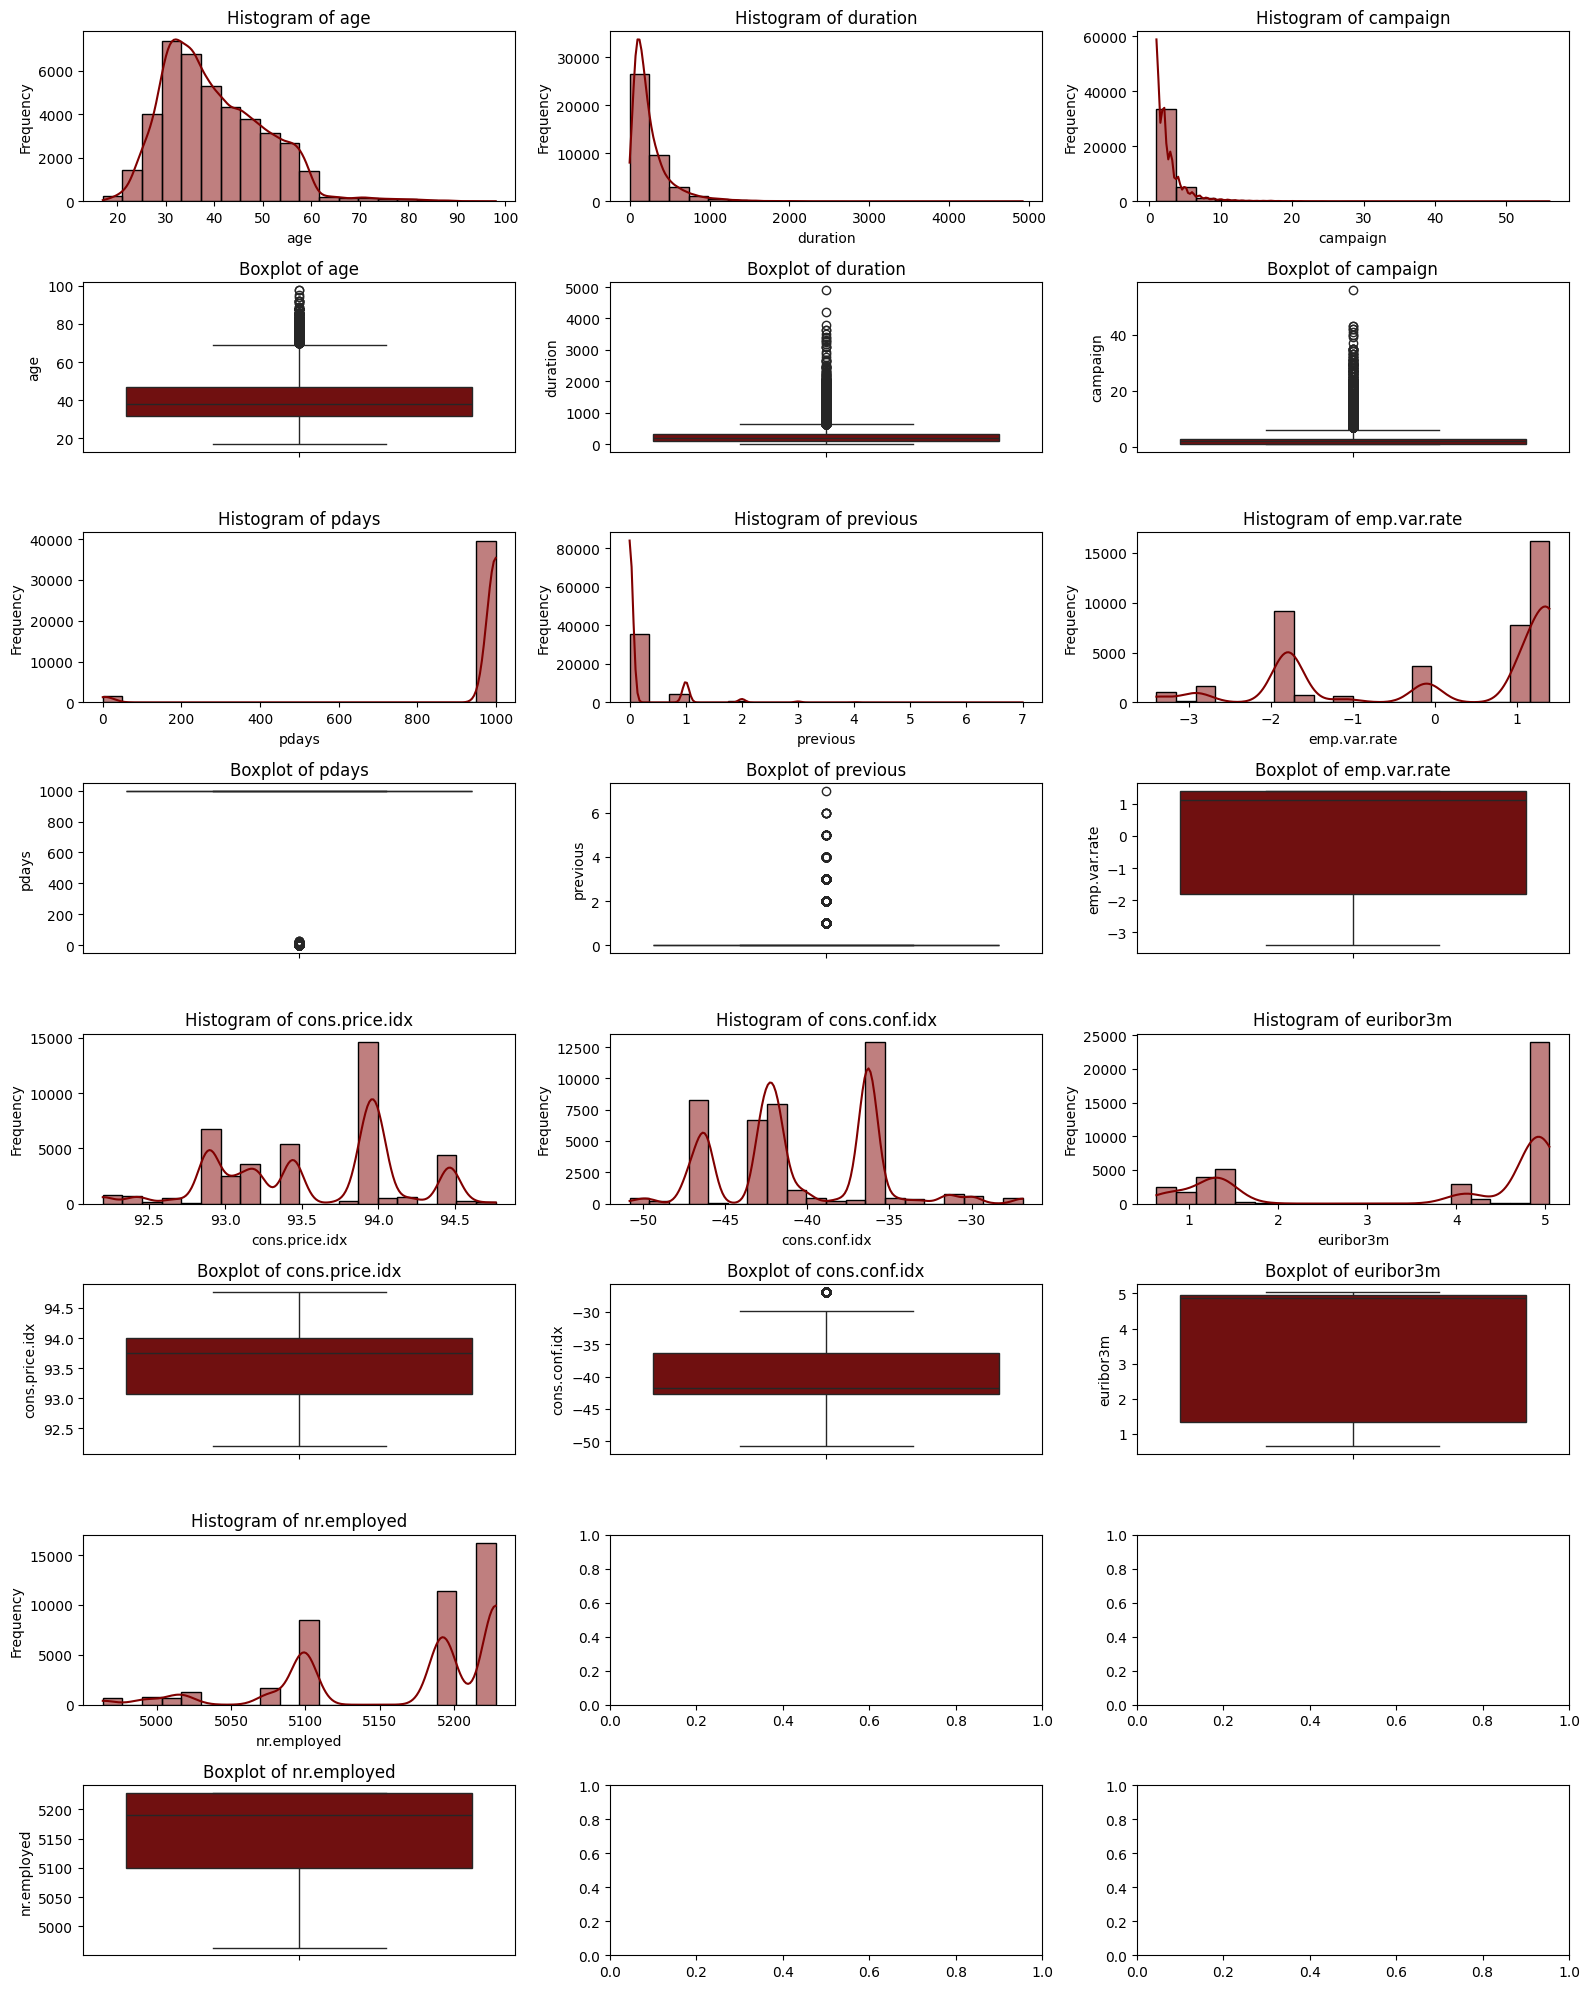

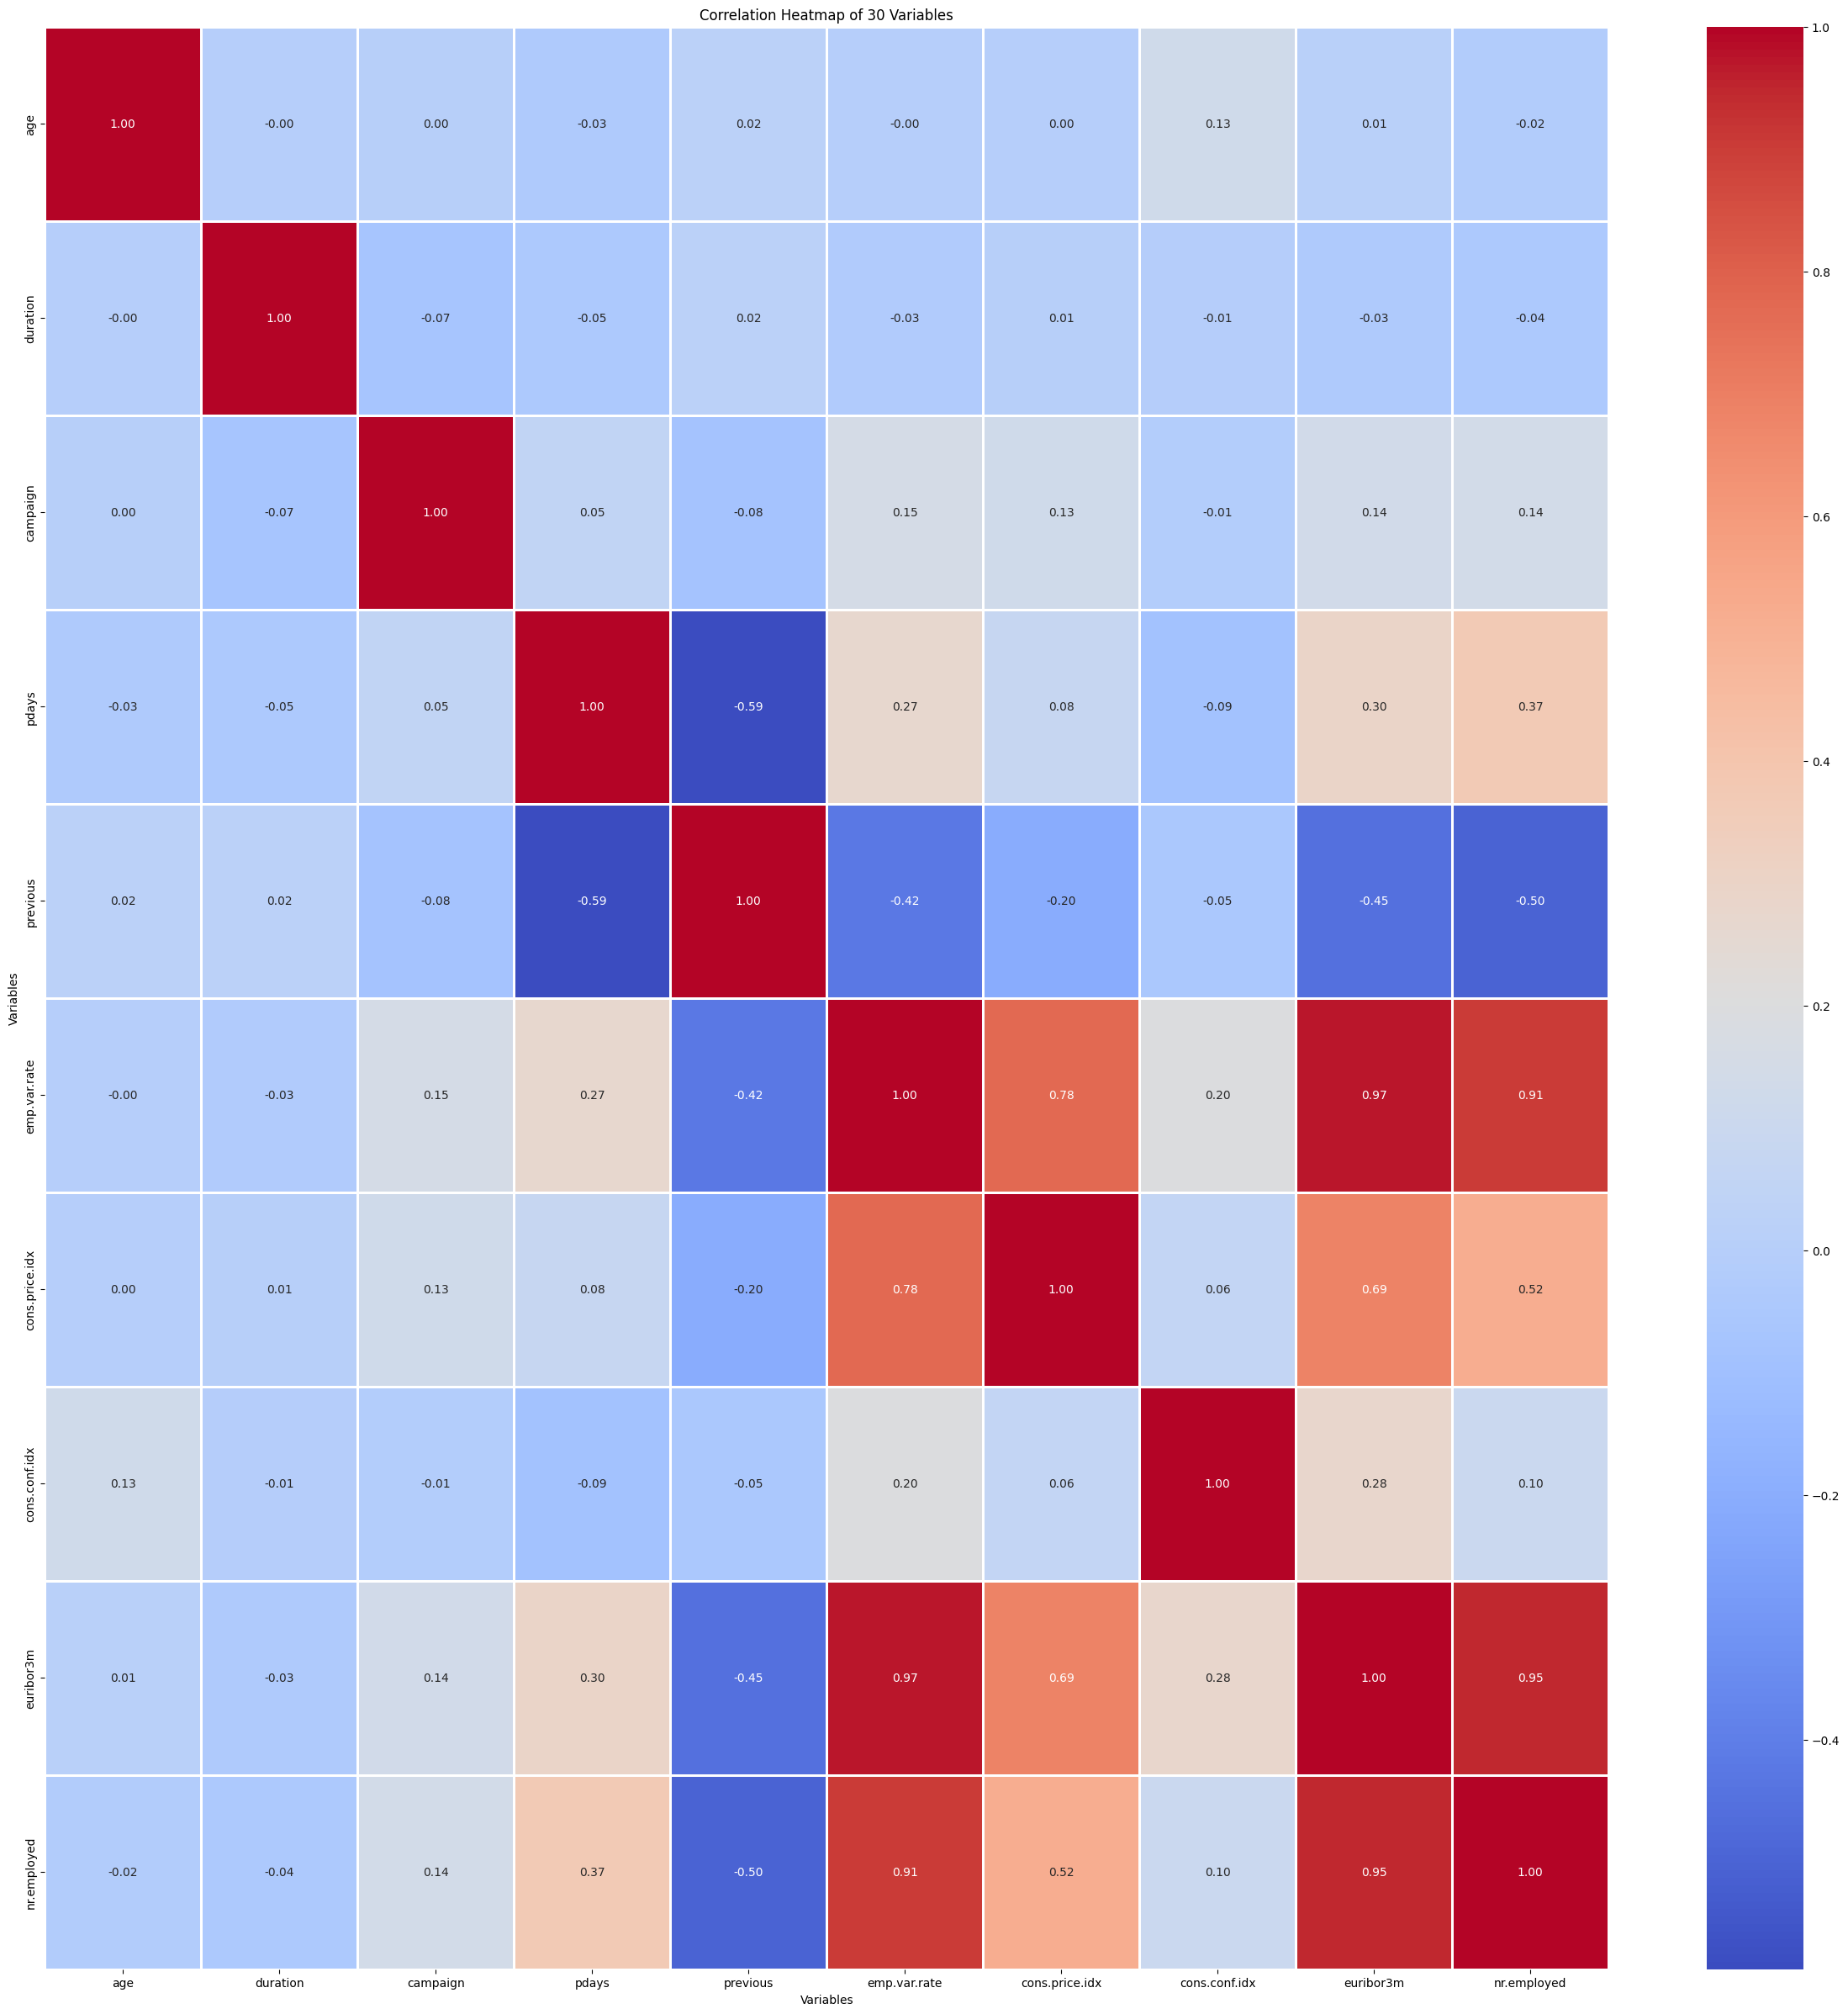

In [ ]:
eda(bank)

In [ ]:
# Drop coulmns with lower p-value and high multi collinearity("area_worst",'radius_worst','perimeter_worst')
columns_to_drop=['housing','loan','emp.var.rate','euribor3m']
bank.drop(columns=columns_to_drop,inplace=True)

In [ ]:
bank=encode_numerical_features(bank)

Encoding mapping for job:
  admin. -> 0
  blue-collar -> 1
  entrepreneur -> 2
  housemaid -> 3
  management -> 4
  retired -> 5
  self-employed -> 6
  services -> 7
  student -> 8
  technician -> 9
  unemployed -> 10
  unknown -> 11
Encoding mapping for marital:
  divorced -> 0
  married -> 1
  single -> 2
  unknown -> 3
Encoding mapping for education:
  basic.4y -> 0
  basic.6y -> 1
  basic.9y -> 2
  high.school -> 3
  illiterate -> 4
  professional.course -> 5
  university.degree -> 6
  unknown -> 7
Encoding mapping for default:
  no -> 0
  unknown -> 1
  yes -> 2
Encoding mapping for contact:
  cellular -> 0
  telephone -> 1
Encoding mapping for month:
  apr -> 0
  aug -> 1
  dec -> 2
  jul -> 3
  jun -> 4
  mar -> 5
  may -> 6
  nov -> 7
  oct -> 8
  sep -> 9
Encoding mapping for day_of_week:
  fri -> 0
  mon -> 1
  thu -> 2
  tue -> 3
  wed -> 4
Encoding mapping for poutcome:
  failure -> 0
  nonexistent -> 1
  success -> 2
Encoding mapping for y:
  no -> 0
  yes -> 1


In [ ]:
bank=z_score_normalize_n(bank)

## Experiment no 1: Using all features and cv

In [ ]:
X = bank.drop('y', axis=1)
y = bank['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


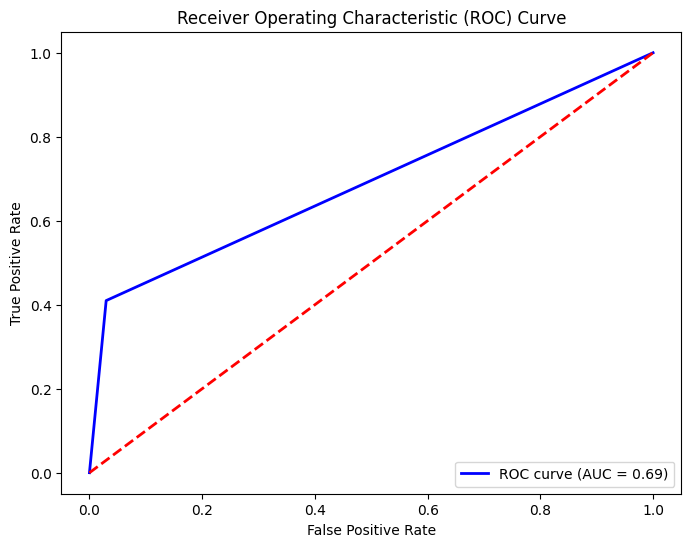

Confusion Matrix:
[[10604   324]
 [  841   584]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10928
           1       0.64      0.41      0.50      1425

    accuracy                           0.91     12353
   macro avg       0.78      0.69      0.72     12353
weighted avg       0.89      0.91      0.90     12353



In [ ]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'None')

In [ ]:
from tabulate import tabulate

# Assuming `results_df` is your DataFrame
print(tabulate(results_df, headers='keys', tablefmt='pipe'))

|    | Balancing Technique   | Model Name           |   Accuracy |   Precision |   Recall |   AUC_ROCcurve |
|---:|:----------------------|:---------------------|-----------:|------------:|---------:|---------------:|
|  0 | None                  | LogisticRegression() |   0.905691 |    0.643172 | 0.409825 |       0.690088 |


In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.09924488 0.15732759 0.21875    0.15517241 0.72306034]


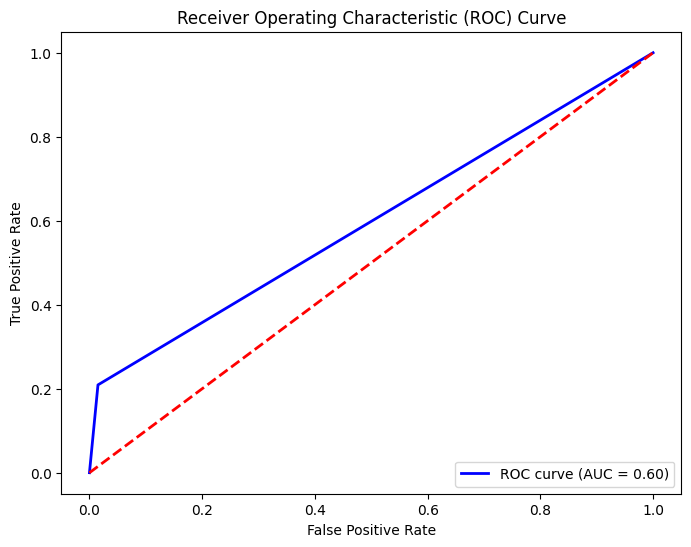

Confusion Matrix:
[[10763   165]
 [ 1127   298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10928
           1       0.64      0.21      0.32      1425

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'None')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.03663793 0.12823276 0.36206897 0.51508621]


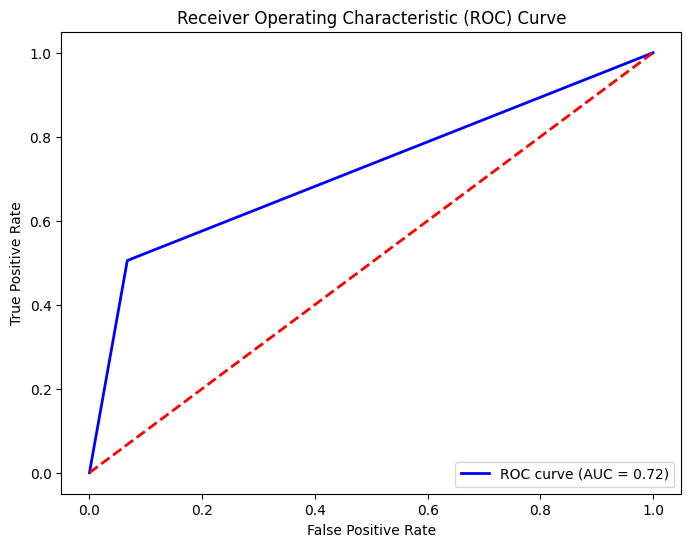

Confusion Matrix:
[[10194   734]
 [  705   720]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10928
           1       0.50      0.51      0.50      1425

    accuracy                           0.88     12353
   macro avg       0.72      0.72      0.72     12353
weighted avg       0.88      0.88      0.88     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'None')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.03559871 0.10883621 0.04633621 0.04418103 1.        ]


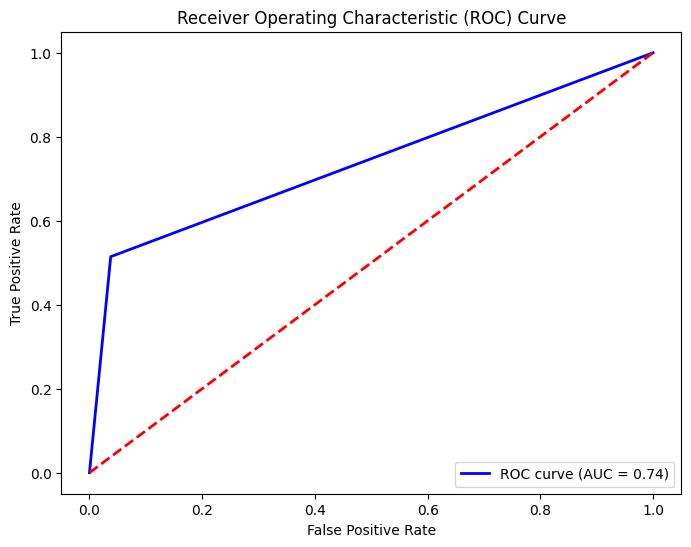

Confusion Matrix:
[[10516   412]
 [  692   733]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10928
           1       0.64      0.51      0.57      1425

    accuracy                           0.91     12353
   macro avg       0.79      0.74      0.76     12353
weighted avg       0.90      0.91      0.91     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'None')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.02265372 0.01831897 0.02801724 0.00538793 1.        ]


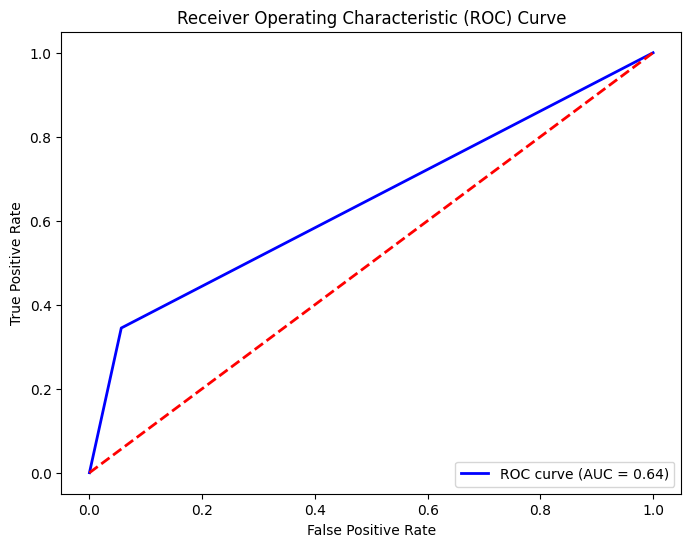

Confusion Matrix:
[[10311   617]
 [  934   491]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10928
           1       0.44      0.34      0.39      1425

    accuracy                           0.87     12353
   macro avg       0.68      0.64      0.66     12353
weighted avg       0.86      0.87      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'None')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.06357759 0.24353448 0.46551724 0.69073276]


In [ ]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+---------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|   | Balancing Technique |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+---+---------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0 |        None         |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1 |        None         |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2 |        None         | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3 |        None         | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.5143859649122807  | 0.7383423235981609 |
| 4 |        

## Experiment no 2: Using Feature Selection and CV

In [ ]:
X = bank.drop('y', axis=1)
y = bank['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


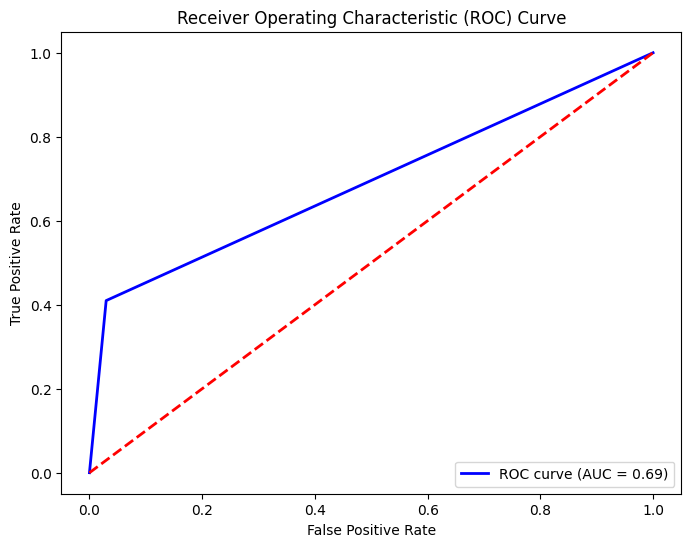

Confusion Matrix:
[[10604   324]
 [  841   584]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10928
           1       0.64      0.41      0.50      1425

    accuracy                           0.91     12353
   macro avg       0.78      0.69      0.72     12353
weighted avg       0.89      0.91      0.90     12353



In [ ]:
warnings.filterwarnings("ignore")

apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'with feature selection')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.09924488 0.15732759 0.21875    0.15517241 0.72306034]


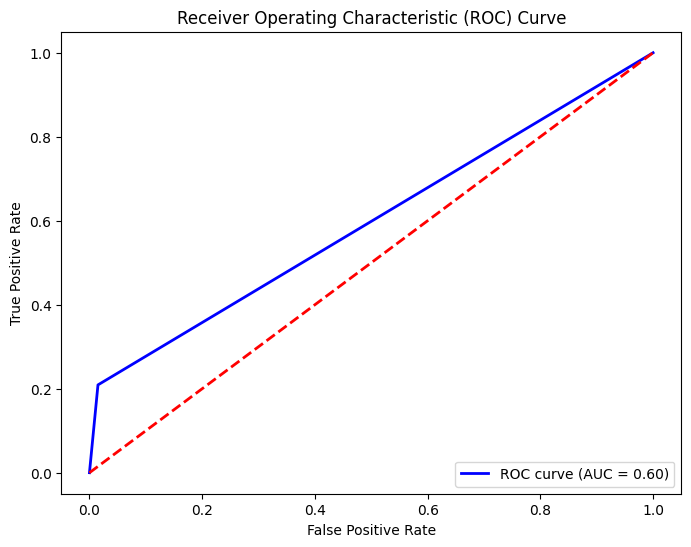

Confusion Matrix:
[[10763   165]
 [ 1127   298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10928
           1       0.64      0.21      0.32      1425

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'with feature selection')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.03663793 0.12823276 0.36206897 0.51508621]


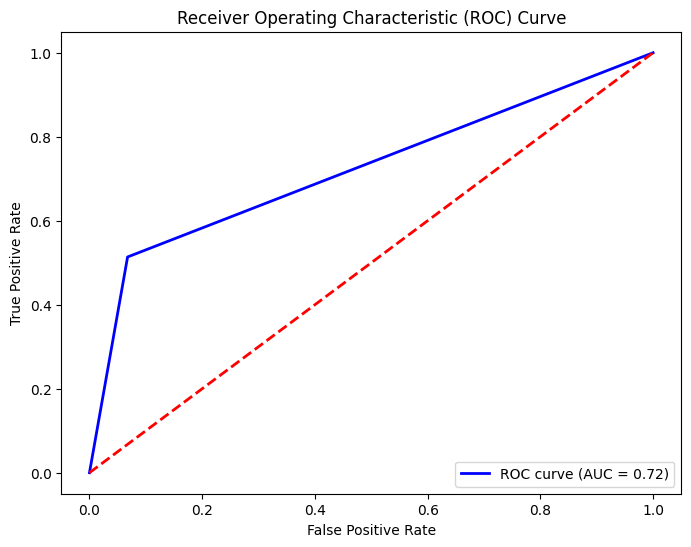

Confusion Matrix:
[[10189   739]
 [  693   732]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10928
           1       0.50      0.51      0.51      1425

    accuracy                           0.88     12353
   macro avg       0.72      0.72      0.72     12353
weighted avg       0.89      0.88      0.88     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'with feature selection')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.03236246 0.10668103 0.04202586 0.03771552 1.        ]


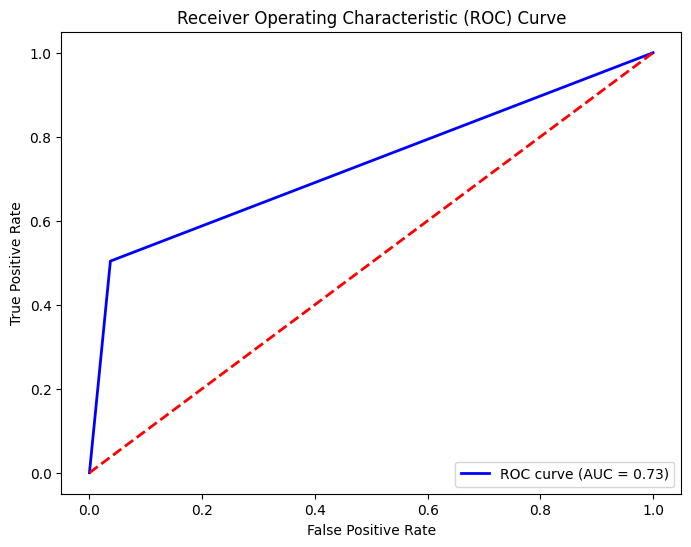

Confusion Matrix:
[[10522   406]
 [  707   718]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10928
           1       0.64      0.50      0.56      1425

    accuracy                           0.91     12353
   macro avg       0.79      0.73      0.76     12353
weighted avg       0.90      0.91      0.91     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'with feature selection')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.02481122 0.02586207 0.03340517 0.00538793 1.        ]


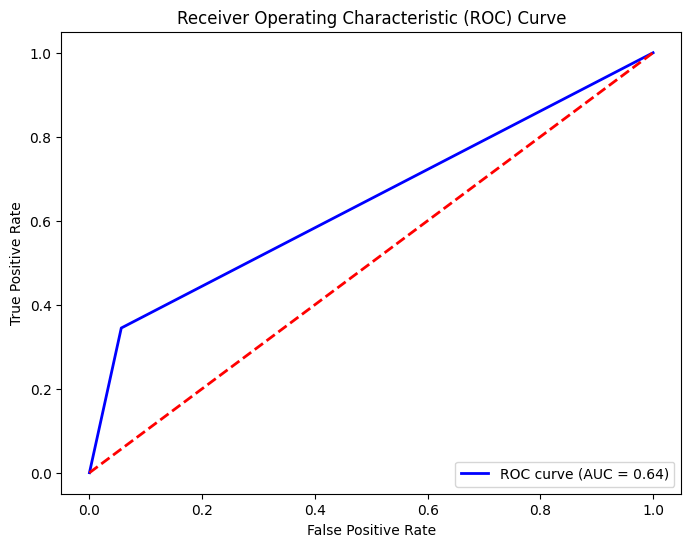

Confusion Matrix:
[[10311   617]
 [  934   491]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10928
           1       0.44      0.34      0.39      1425

    accuracy                           0.87     12353
   macro avg       0.68      0.64      0.66     12353
weighted avg       0.86      0.87      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'with feature selection')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.06357759 0.24353448 0.46551724 0.69073276]


In [ ]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|   |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+---+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0 |          None          |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1 |          None          |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2 |          None          | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3 |          None          | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.5143859649122807  | 0.73834232359

## Experiment no 3:Resampling by SMOTE(train_data) with and without cv

In [ ]:
# Split dataset into train and test
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

bank_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)


bank_train=apply_smote(bank_train, 'y')
bank_train.to_csv('bank_balanced_smote_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file

In [ ]:
value_counts = bank_train['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 25608
Category value 1: Number of occurrences: 25608


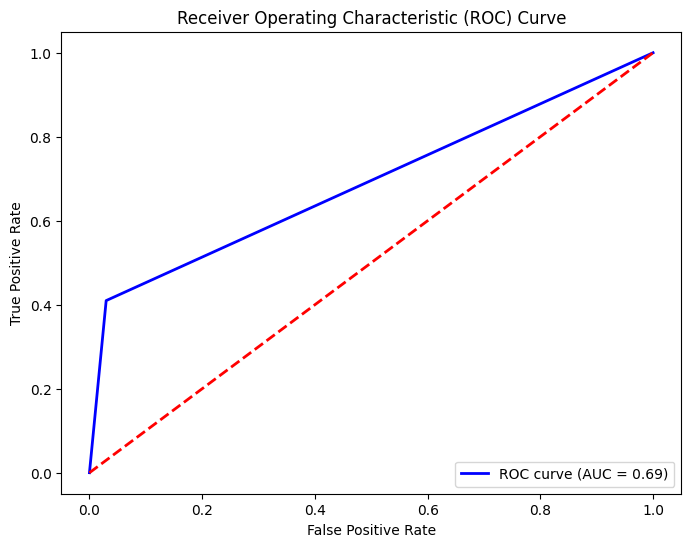

Confusion Matrix:
[[10604   324]
 [  841   584]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10928
           1       0.64      0.41      0.50      1425

    accuracy                           0.91     12353
   macro avg       0.78      0.69      0.72     12353
weighted avg       0.89      0.91      0.90     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'SMOTE(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.09924488 0.15732759 0.21875    0.15517241 0.72306034]


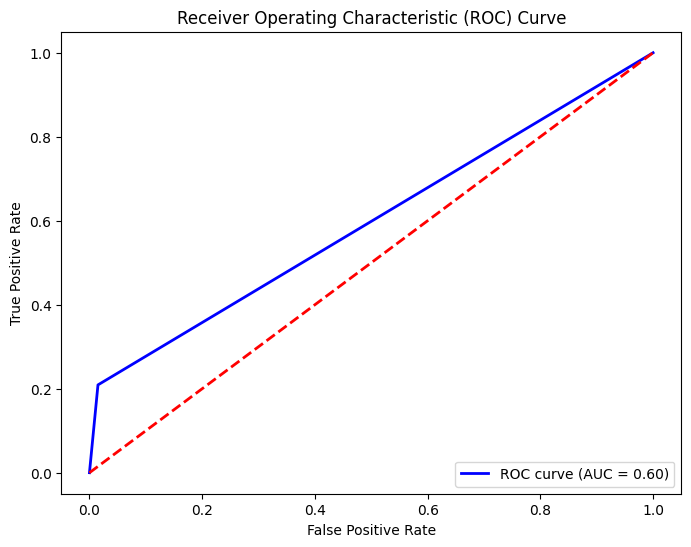

Confusion Matrix:
[[10763   165]
 [ 1127   298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10928
           1       0.64      0.21      0.32      1425

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'SMOTE(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.03663793 0.12823276 0.36206897 0.51508621]


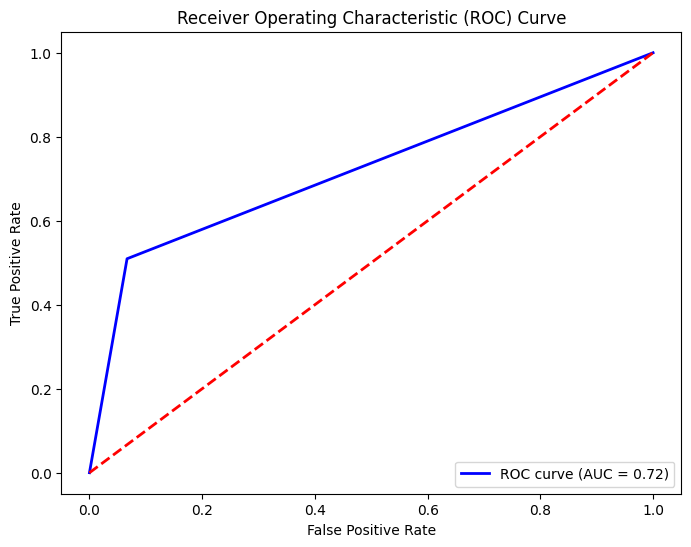

Confusion Matrix:
[[10199   729]
 [  699   726]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10928
           1       0.50      0.51      0.50      1425

    accuracy                           0.88     12353
   macro avg       0.72      0.72      0.72     12353
weighted avg       0.89      0.88      0.88     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'SMOTE(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.03667745 0.09590517 0.04418103 0.04310345 1.        ]


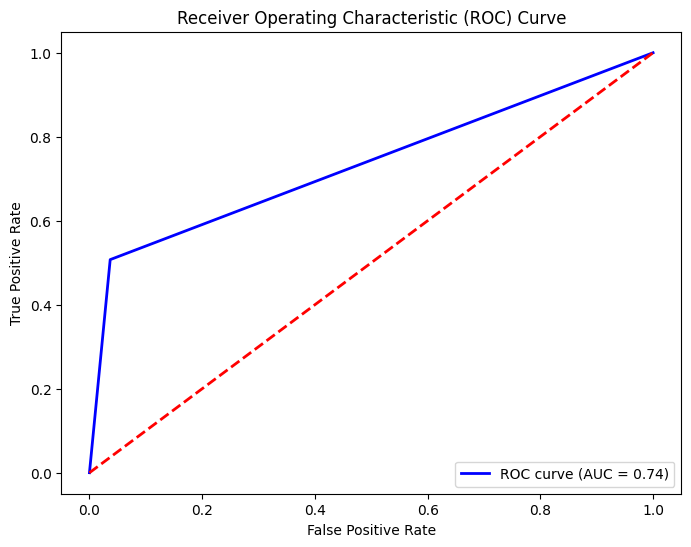

Confusion Matrix:
[[10526   402]
 [  702   723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10928
           1       0.64      0.51      0.57      1425

    accuracy                           0.91     12353
   macro avg       0.79      0.74      0.76     12353
weighted avg       0.90      0.91      0.91     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'SMOTE(train_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.02588997 0.01939655 0.03340517 0.00538793 1.        ]


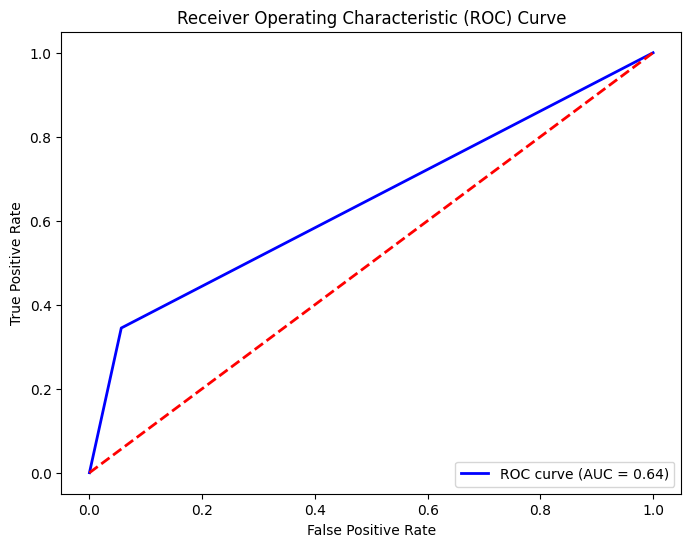

Confusion Matrix:
[[10311   617]
 [  934   491]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10928
           1       0.44      0.34      0.39      1425

    accuracy                           0.87     12353
   macro avg       0.68      0.64      0.66     12353
weighted avg       0.86      0.87      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'SMOTE(train_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.06357759 0.24353448 0.46551724 0.69073276]


In [ ]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |          None          |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2  |          None          | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3  |          None          | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.5143859649122807  | 0.7383

## Experiment no 4:Resampling by SMOTE (whole_data) with and without cv

In [ ]:
# Split dataset into train and test
bank_smote=apply_smote(bank, 'y')
bank_smote.to_csv('bank_smote_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file




In [ ]:
value_counts = bank_smote['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 36536
Category value 1: Number of occurrences: 36536


In [ ]:
bank_smote=dealing_with_duplicates(bank_smote)


X = bank_smote.drop('y', axis=1)
y = bank_smote['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 19
All the duplicate rows have been deleted from data set


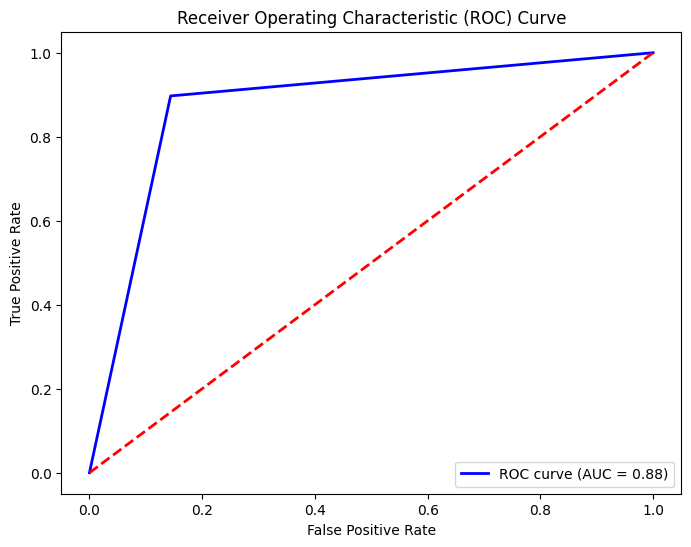

Confusion Matrix:
[[9417 1584]
 [1123 9792]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     11001
           1       0.86      0.90      0.88     10915

    accuracy                           0.88     21916
   macro avg       0.88      0.88      0.88     21916
weighted avg       0.88      0.88      0.88     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'SMOTE(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.84626968 0.87530797 0.89419655 0.91526352 0.91813826]


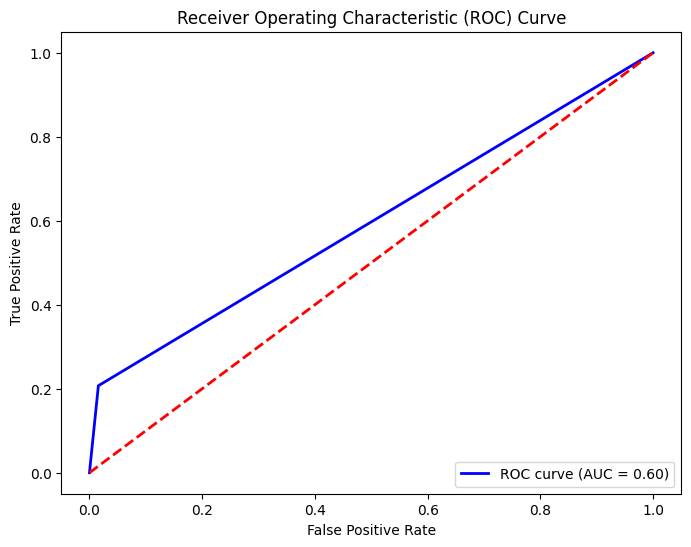

Confusion Matrix:
[[10827   174]
 [ 8654  2261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.71     11001
           1       0.93      0.21      0.34     10915

    accuracy                           0.60     21916
   macro avg       0.74      0.60      0.52     21916
weighted avg       0.74      0.60      0.53     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'SMOTE(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.2072553  0.21010129 0.21297564 0.21451061 0.20862423]


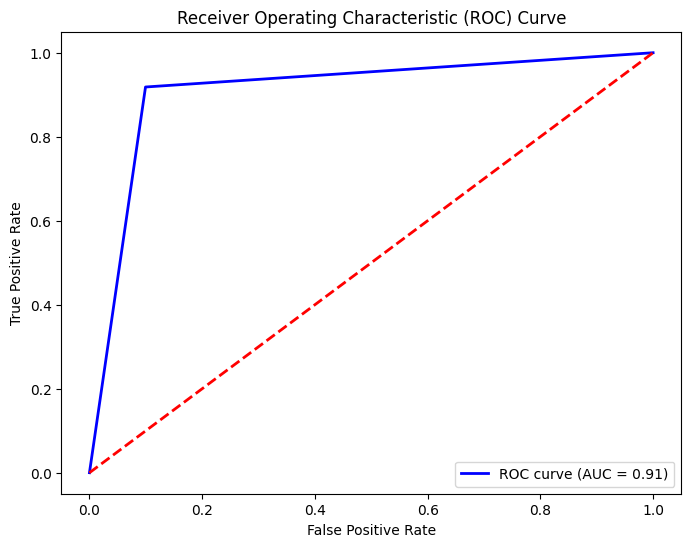

Confusion Matrix:
[[ 9907  1094]
 [  891 10024]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11001
           1       0.90      0.92      0.91     10915

    accuracy                           0.91     21916
   macro avg       0.91      0.91      0.91     21916
weighted avg       0.91      0.91      0.91     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'SMOTE(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.77932923 0.94552423 0.94210238 0.95359343 0.96276523]


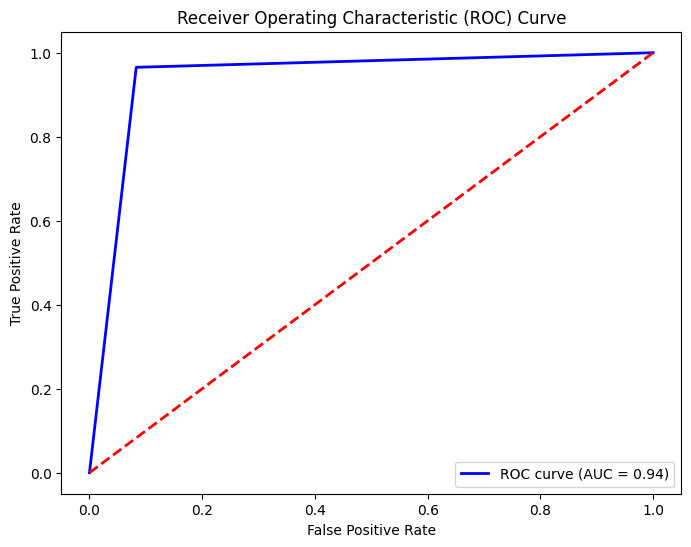

Confusion Matrix:
[[10088   913]
 [  379 10536]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11001
           1       0.92      0.97      0.94     10915

    accuracy                           0.94     21916
   macro avg       0.94      0.94      0.94     21916
weighted avg       0.94      0.94      0.94     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'SMOTE(whole_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.84257358 0.9833014  0.98562825 0.98918549 0.98822724]


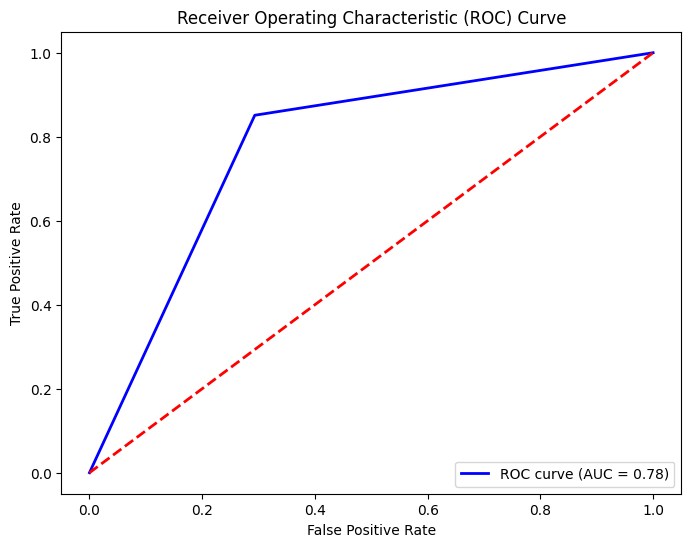

Confusion Matrix:
[[7774 3227]
 [1625 9290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76     11001
           1       0.74      0.85      0.79     10915

    accuracy                           0.78     21916
   macro avg       0.78      0.78      0.78     21916
weighted avg       0.78      0.78      0.78     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'SMOTE(whole_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.73182752 0.84519573 0.83534082 0.82108145 0.81724846]


In [ ]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |          None          |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2  |          None          | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3  |          None          | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.5143859649122807  | 0.7383

## Experiment no 5:Resampling by Adasyn(train_data)

In [ ]:
# Split dataset into train and test
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

bank_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)


bank_train=apply_adasyn(bank_train, 'y')
bank_train.to_csv('bank_adasyn_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [ ]:
value_counts = bank_train['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 25608
Category value 1: Number of occurrences: 25560


In [ ]:
bank_train=dealing_with_duplicates(bank_train)
X = bank_train.drop('y', axis=1)
y = bank_train['y']

Number of duplicate rows in your data set: 6
All the duplicate rows have been deleted from data set


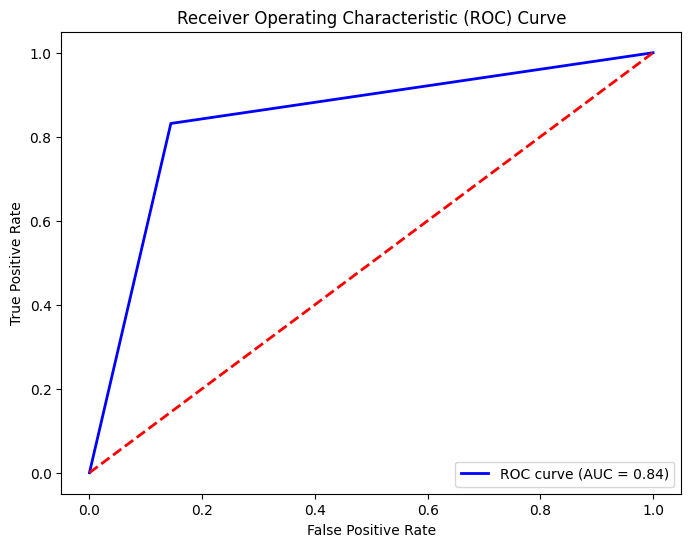

Confusion Matrix:
[[9350 1578]
 [ 240 1185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     10928
           1       0.43      0.83      0.57      1425

    accuracy                           0.85     12353
   macro avg       0.70      0.84      0.74     12353
weighted avg       0.91      0.85      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, LogisticRegression(), 'ADASYN(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.85915493 0.89260563 0.89591078 0.90725885 0.88906281]


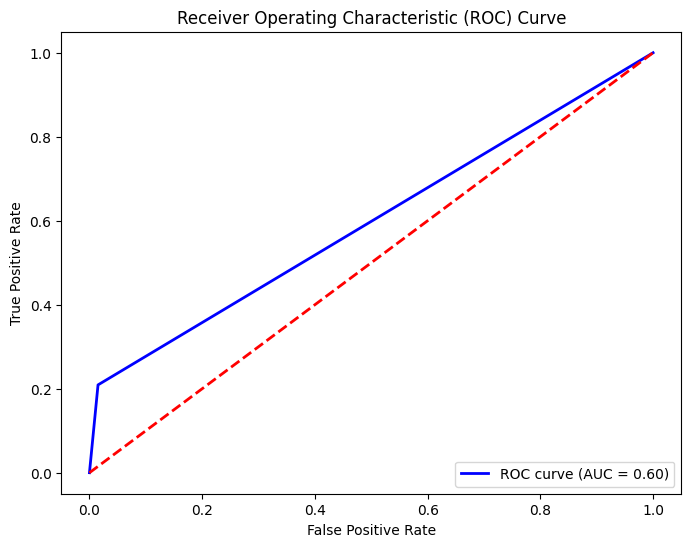

Confusion Matrix:
[[10762   166]
 [ 1127   298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10928
           1       0.64      0.21      0.32      1425

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.87      0.90      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, SVC(), 'ADASYN(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.16764476 0.10758998 0.09450205 0.10037175 0.08726277]


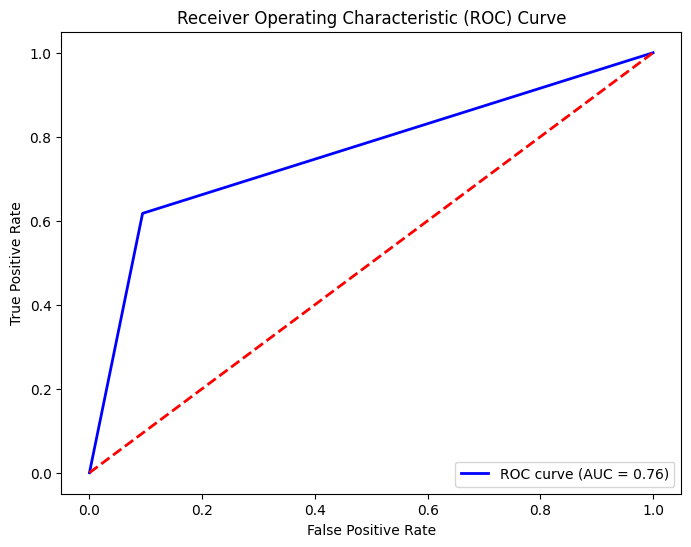

Confusion Matrix:
[[9898 1030]
 [ 545  880]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10928
           1       0.46      0.62      0.53      1425

    accuracy                           0.87     12353
   macro avg       0.70      0.76      0.73     12353
weighted avg       0.89      0.87      0.88     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, DecisionTreeClassifier(), 'ADASYN(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.75997653 0.92057903 0.91841127 0.90686754 0.91058501]


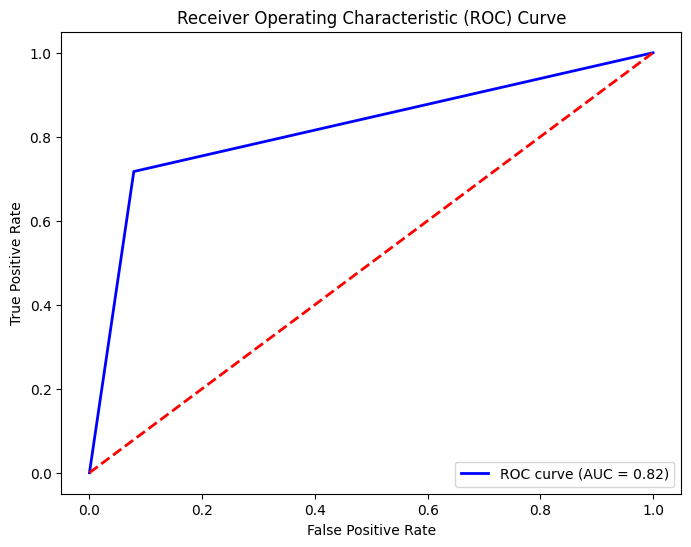

Confusion Matrix:
[[10068   860]
 [  403  1022]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10928
           1       0.54      0.72      0.62      1425

    accuracy                           0.90     12353
   macro avg       0.75      0.82      0.78     12353
weighted avg       0.91      0.90      0.90     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, RandomForestClassifier(), 'ADASYN(train_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.83431142 0.97554773 0.9757386  0.97358638 0.97926042]


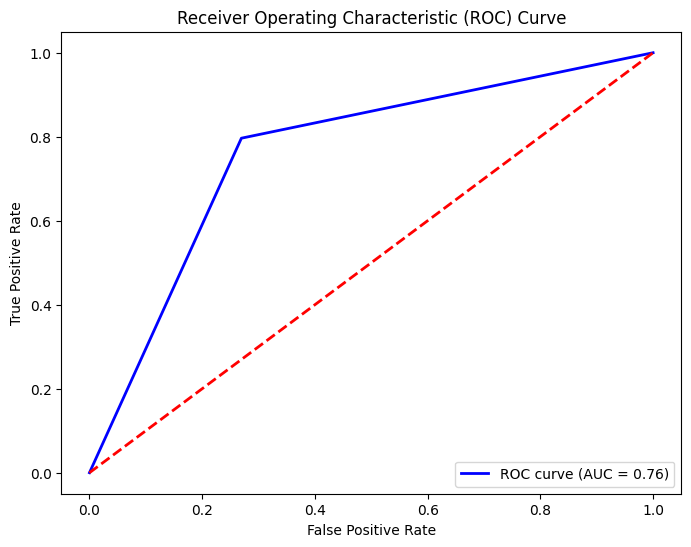

Confusion Matrix:
[[7982 2946]
 [ 290 1135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     10928
           1       0.28      0.80      0.41      1425

    accuracy                           0.74     12353
   macro avg       0.62      0.76      0.62     12353
weighted avg       0.89      0.74      0.78     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, BernoulliNB(), 'ADASYN(train_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79440532 0.85524257 0.85462727 0.84621405 0.84797496]


In [ ]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |          None          |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2  |          None          | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3  |          None          | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.5143859649122807  | 0.7383

## Experiment no 6:Resampling by Adasyn (whole_data) with and without cv

In [ ]:
# Split dataset into train and test
bank_adasyn=apply_smote(bank, 'y')
bank_adasyn.to_csv('bank_adasyn_wholedata.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file





In [ ]:
value_counts = bank_adasyn['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 36536
Category value 1: Number of occurrences: 36536


In [ ]:
bank_adasyn=dealing_with_duplicates(bank_adasyn)


X = bank_adasyn.drop('y', axis=1)
y = bank_adasyn['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 19
All the duplicate rows have been deleted from data set


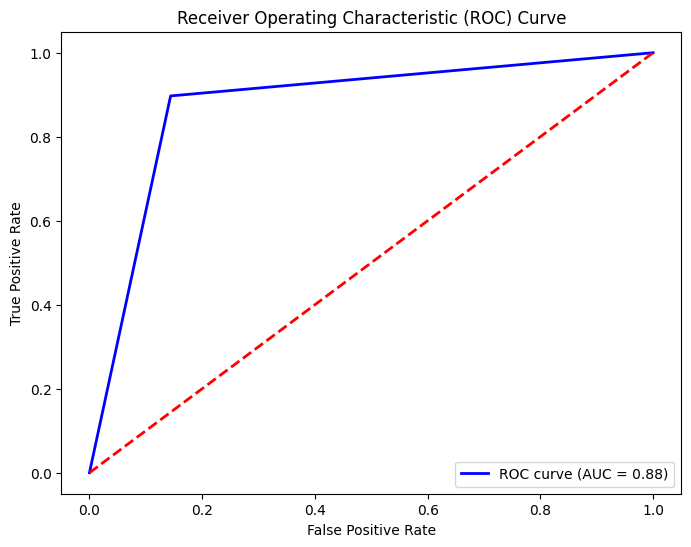

Confusion Matrix:
[[9417 1584]
 [1123 9792]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     11001
           1       0.86      0.90      0.88     10915

    accuracy                           0.88     21916
   macro avg       0.88      0.88      0.88     21916
weighted avg       0.88      0.88      0.88     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'ADASYN(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.84626968 0.87530797 0.89419655 0.91526352 0.91813826]


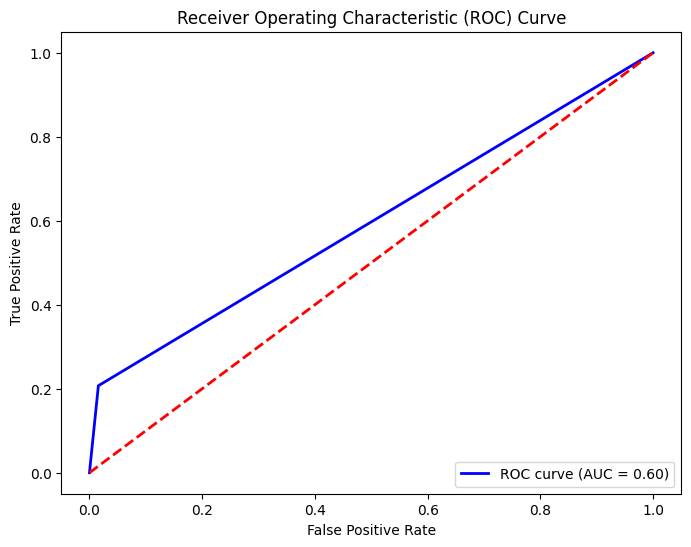

Confusion Matrix:
[[10827   174]
 [ 8654  2261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.71     11001
           1       0.93      0.21      0.34     10915

    accuracy                           0.60     21916
   macro avg       0.74      0.60      0.52     21916
weighted avg       0.74      0.60      0.53     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'ADASYN(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.2072553  0.21010129 0.21297564 0.21451061 0.20862423]


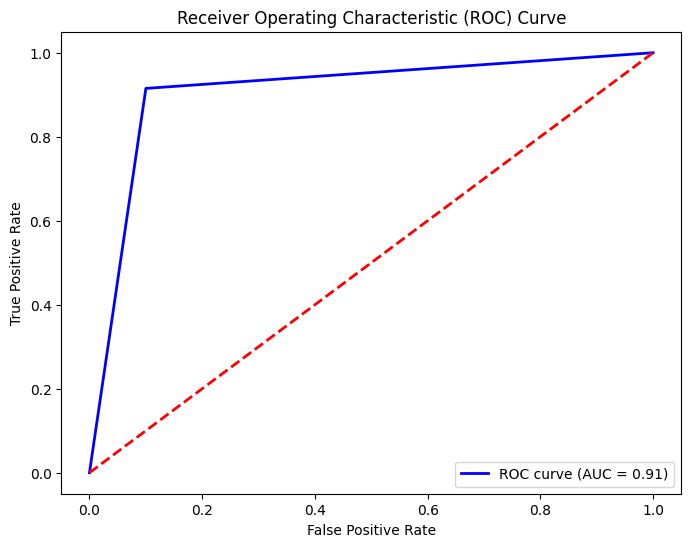

Confusion Matrix:
[[9900 1101]
 [ 927 9988]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11001
           1       0.90      0.92      0.91     10915

    accuracy                           0.91     21916
   macro avg       0.91      0.91      0.91     21916
weighted avg       0.91      0.91      0.91     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'ADASYN(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.78138261 0.9456611  0.94319737 0.954141   0.96577687]


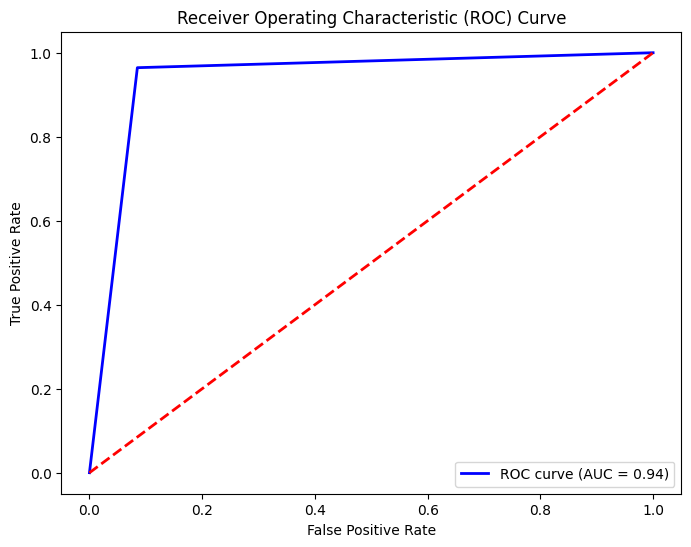

Confusion Matrix:
[[10066   935]
 [  389 10526]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11001
           1       0.92      0.96      0.94     10915

    accuracy                           0.94     21916
   macro avg       0.94      0.94      0.94     21916
weighted avg       0.94      0.94      0.94     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'ADASYN(whole_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.84175222 0.9827539  0.98686011 0.98945927 0.98795346]


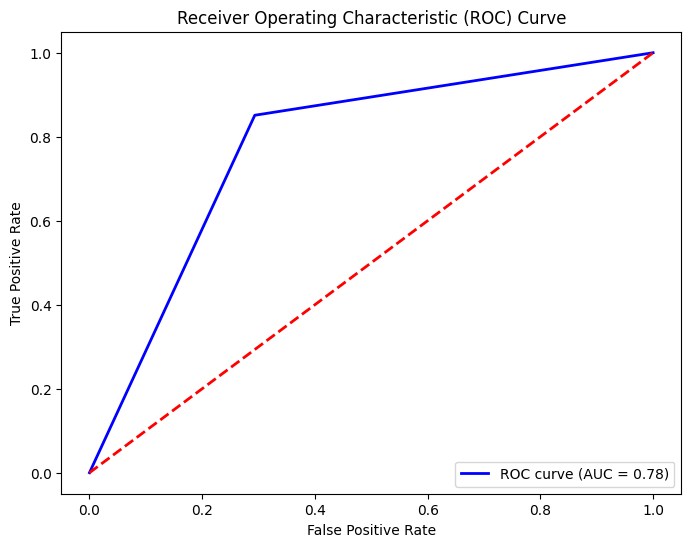

Confusion Matrix:
[[7774 3227]
 [1625 9290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76     11001
           1       0.74      0.85      0.79     10915

    accuracy                           0.78     21916
   macro avg       0.78      0.78      0.78     21916
weighted avg       0.78      0.78      0.78     21916



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'ADASYN(whole_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.73182752 0.84519573 0.83534082 0.82108145 0.81724846]


In [ ]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |          None          |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2  |          None          | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3  |          None          | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.5143859649122807  | 0.7383

## Experiment no 7:Resampling by Under Sampling(train_data):

In [ ]:
# Split dataset into train and test
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


X_train,y_train=apply_undersampling(X_train,y_train)
bank_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
bank_train.to_csv('bank_undersampling_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [ ]:
value_counts = bank_train['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 3214
Category value 1: Number of occurrences: 3214


In [ ]:
bank_train=dealing_with_duplicates(bank_train)
X = bank_train.drop('y', axis=1)
y = bank_train['y']

Number of duplicate rows in your data set: 0
All the duplicate rows have been deleted from data set


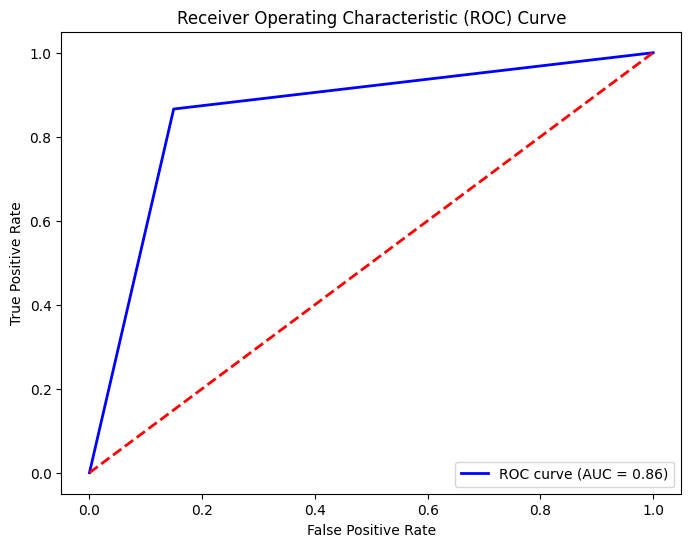

Confusion Matrix:
[[9295 1633]
 [ 191 1234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10928
           1       0.43      0.87      0.58      1425

    accuracy                           0.85     12353
   macro avg       0.71      0.86      0.74     12353
weighted avg       0.92      0.85      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, LogisticRegression(), 'UnderSampling(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.85381026 0.86469673 0.88024883 0.86915888 0.86314152]


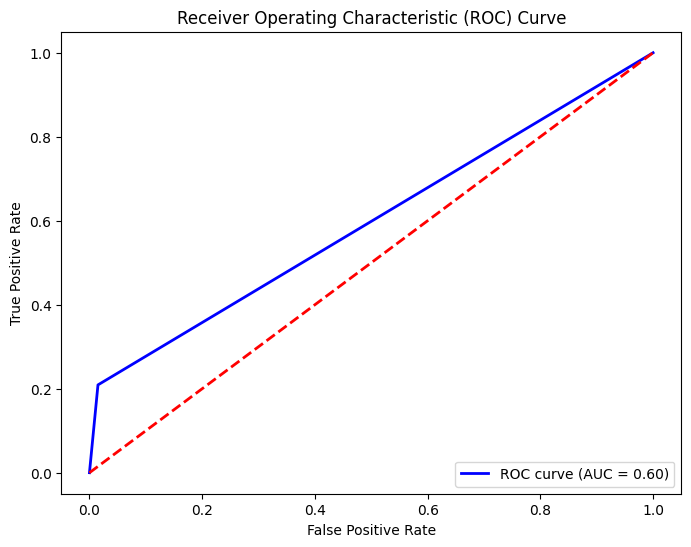

Confusion Matrix:
[[10763   165]
 [ 1127   298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10928
           1       0.64      0.21      0.32      1425

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, SVC(), 'UnderSampling(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.22083981 0.21306376 0.19129082 0.2305296  0.18506998]


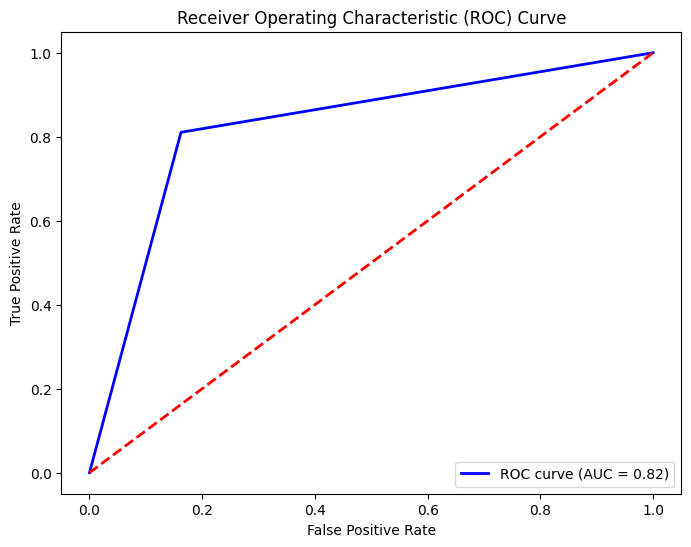

Confusion Matrix:
[[9153 1775]
 [ 270 1155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     10928
           1       0.39      0.81      0.53      1425

    accuracy                           0.83     12353
   macro avg       0.68      0.82      0.71     12353
weighted avg       0.90      0.83      0.86     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, DecisionTreeClassifier(), 'UnderSampling(train_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.81337481 0.83670295 0.83514774 0.77258567 0.81337481]


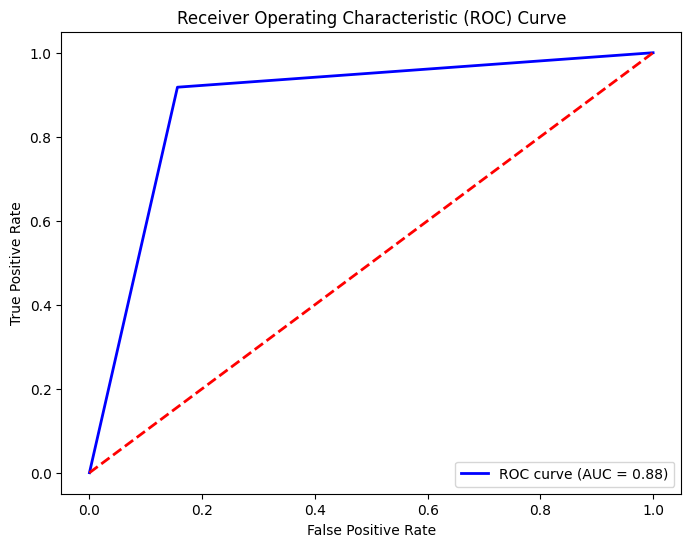

Confusion Matrix:
[[9222 1706]
 [ 117 1308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10928
           1       0.43      0.92      0.59      1425

    accuracy                           0.85     12353
   macro avg       0.71      0.88      0.75     12353
weighted avg       0.92      0.85      0.87     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, RandomForestClassifier(), 'UnderSampling(train_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.91601866 0.91757387 0.93157076 0.91744548 0.93623639]


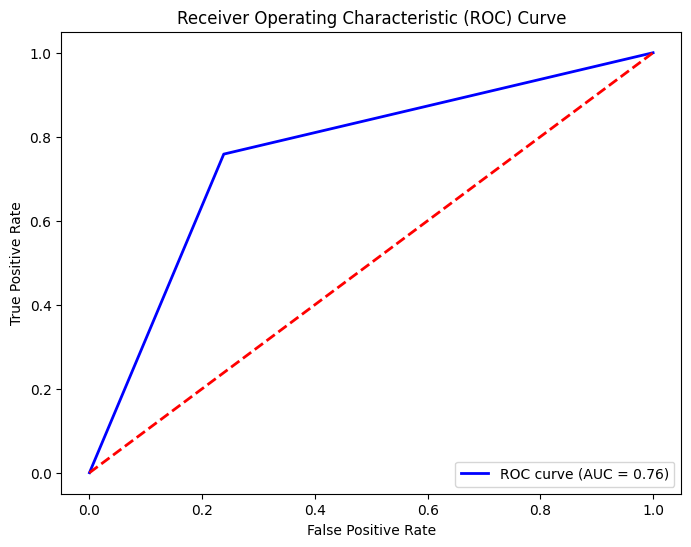

Confusion Matrix:
[[8324 2604]
 [ 344 1081]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     10928
           1       0.29      0.76      0.42      1425

    accuracy                           0.76     12353
   macro avg       0.63      0.76      0.64     12353
weighted avg       0.88      0.76      0.80     12353



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, BernoulliNB(), 'UnderSampling(train_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.72783826 0.73094868 0.74494557 0.72741433 0.7340591 ]


In [ ]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |    Balancing Technique    |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |           None            |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |           None            |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2  |           None            | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3  |           None            | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.51438

## Experiment no 8:Resampling by Undersampling (whole_data):

In [ ]:
# Split dataset into train and test
X = bank.drop('y', axis=1)
y = bank['y']
X,y=apply_undersampling(X, y)


bank_train = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
bank_train.to_csv('bank_undersampling_wholedata.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [ ]:
value_counts = bank_train['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 4639
Category value 1: Number of occurrences: 4639


In [ ]:
bank_train=dealing_with_duplicates(bank_train)
X = bank_train.drop('y', axis=1)
y = bank_train['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 1
All the duplicate rows have been deleted from data set


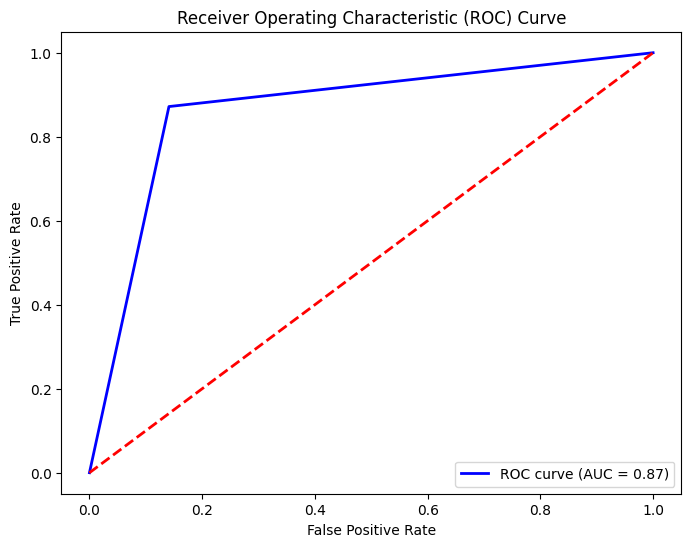

Confusion Matrix:
[[1212  199]
 [ 176 1197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1411
           1       0.86      0.87      0.86      1373

    accuracy                           0.87      2784
   macro avg       0.87      0.87      0.87      2784
weighted avg       0.87      0.87      0.87      2784



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'UnderSampling(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.42672414 0.53556034 0.81337648 0.65193966 0.82650862]


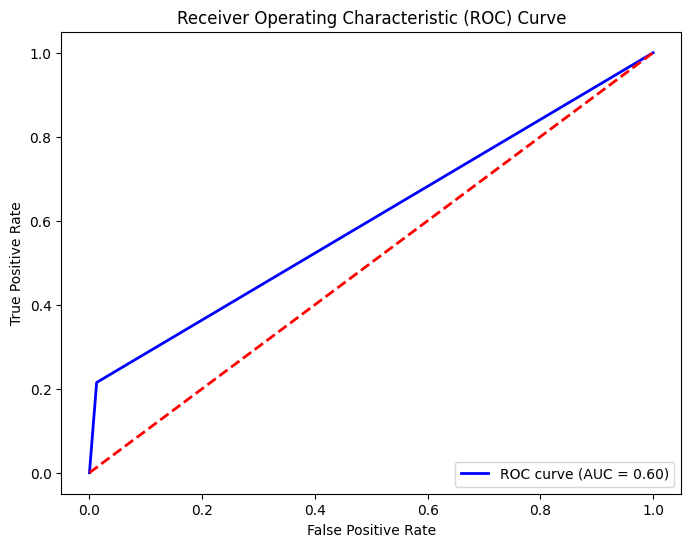

Confusion Matrix:
[[1393   18]
 [1078  295]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.99      0.72      1411
           1       0.94      0.21      0.35      1373

    accuracy                           0.61      2784
   macro avg       0.75      0.60      0.53      2784
weighted avg       0.75      0.61      0.54      2784



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'UnderSampling(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.         0.03663793 0.12837109 0.36206897 0.51508621]


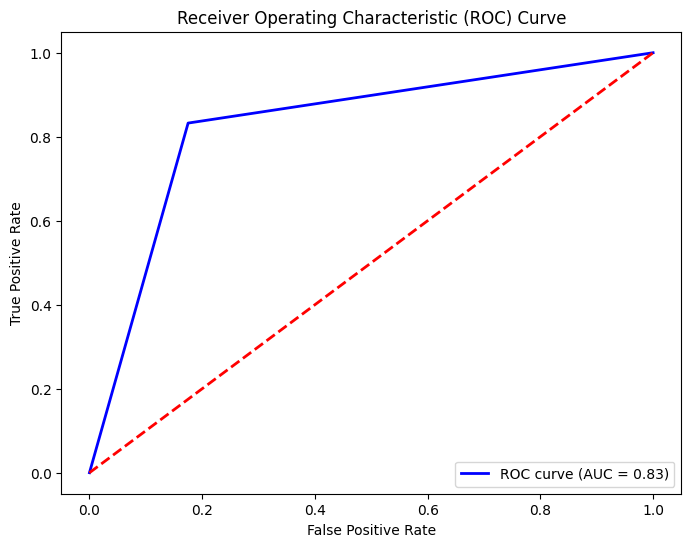

Confusion Matrix:
[[1164  247]
 [ 230 1143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1411
           1       0.82      0.83      0.83      1373

    accuracy                           0.83      2784
   macro avg       0.83      0.83      0.83      2784
weighted avg       0.83      0.83      0.83      2784



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'UnderSampling(whole_data)')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.07866379 0.30926724 0.14131607 0.25323276 0.22306034]


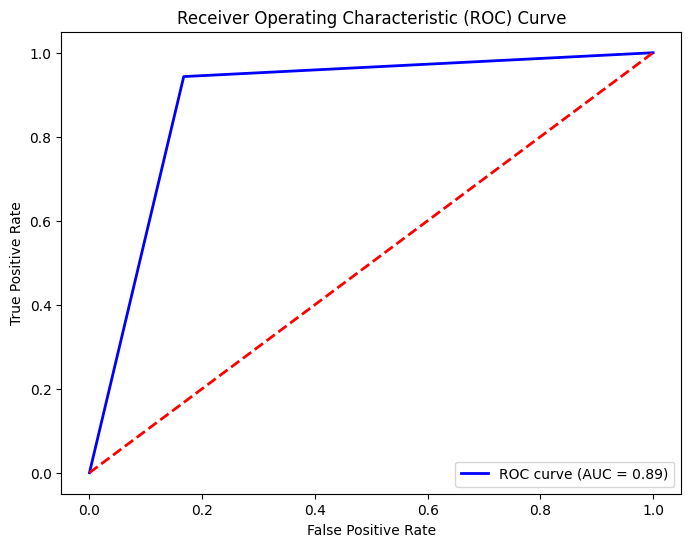

Confusion Matrix:
[[1175  236]
 [  78 1295]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1411
           1       0.85      0.94      0.89      1373

    accuracy                           0.89      2784
   macro avg       0.89      0.89      0.89      2784
weighted avg       0.89      0.89      0.89      2784



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'UnderSampling(whole_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.08081897 0.26077586 0.10895361 0.19181034 0.05711207]


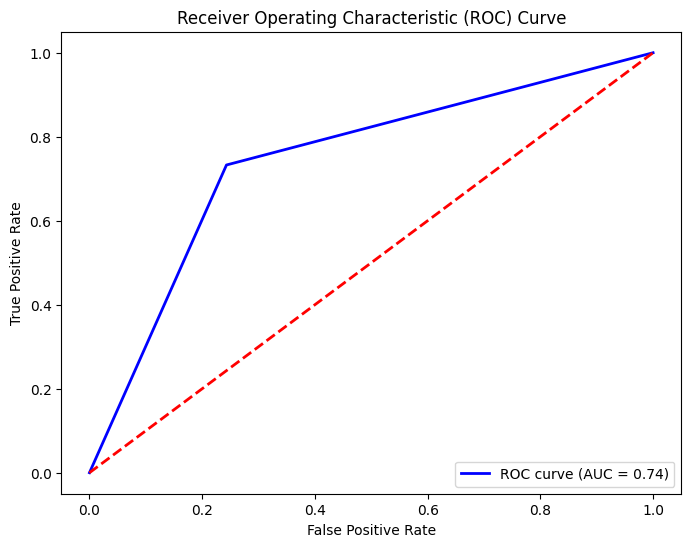

Confusion Matrix:
[[1068  343]
 [ 367 1006]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1411
           1       0.75      0.73      0.74      1373

    accuracy                           0.74      2784
   macro avg       0.74      0.74      0.74      2784
weighted avg       0.74      0.74      0.74      2784



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'UnderSampling(whole_data)')

In [ ]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.0237069  0.52586207 0.86623517 0.78232759 0.85775862]


In [ ]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |    Balancing Technique    |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |           None            |   LogisticRegression()   | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |           None            |          SVC()           | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |
| 2  |           None            | DecisionTreeClassifier() | 0.8835100785234355 | 0.4951856946354883  | 0.5052631578947369  | 0.7190481236032982 |
| 3  |           None            | RandomForestClassifier() | 0.9106289970047762 |  0.640174672489083  | 0.51438

## Experiment 9: Algorithmic Method (Class weighting):

In [ ]:
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



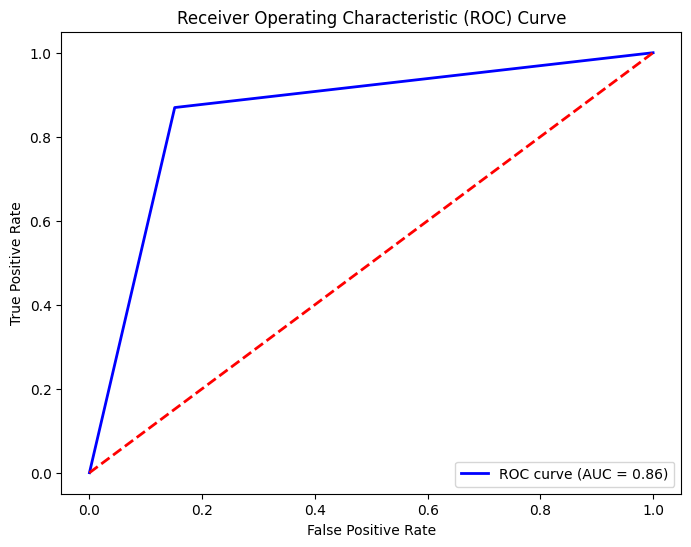

Confusion Matrix:
[[9275 1653]
 [ 186 1239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10928
           1       0.43      0.87      0.57      1425

    accuracy                           0.85     12353
   macro avg       0.70      0.86      0.74     12353
weighted avg       0.92      0.85      0.87     12353



In [ ]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

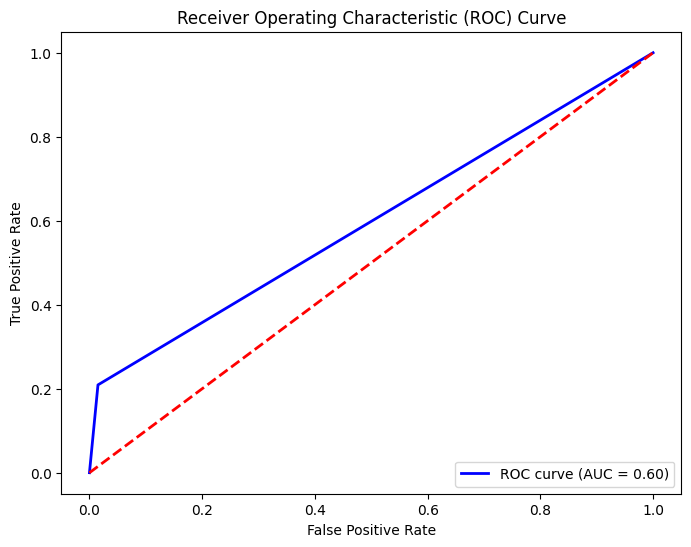

Confusion Matrix:
[[10763   165]
 [ 1127   298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10928
           1       0.64      0.21      0.32      1425

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353



In [ ]:
apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

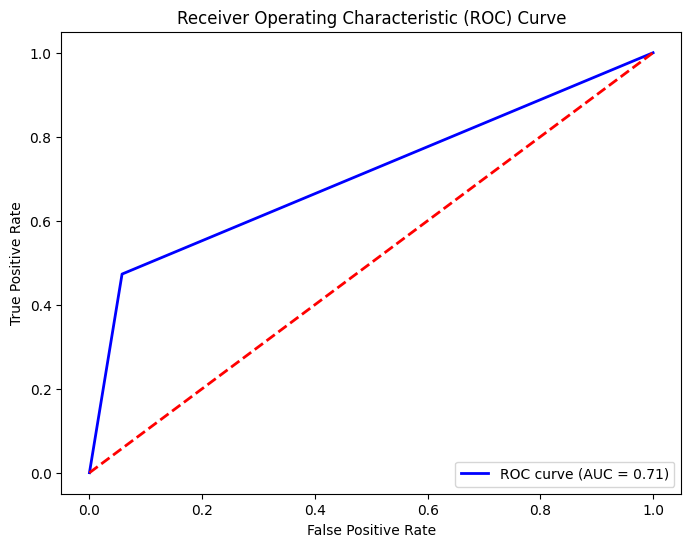

Confusion Matrix:
[[10296   632]
 [  751   674]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10928
           1       0.52      0.47      0.49      1425

    accuracy                           0.89     12353
   macro avg       0.72      0.71      0.72     12353
weighted avg       0.88      0.89      0.89     12353



In [ ]:
apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

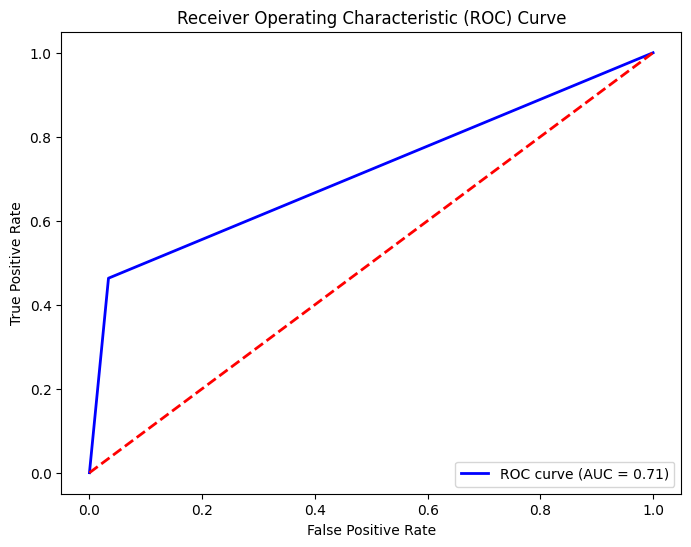

Confusion Matrix:
[[10559   369]
 [  765   660]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10928
           1       0.64      0.46      0.54      1425

    accuracy                           0.91     12353
   macro avg       0.79      0.71      0.74     12353
weighted avg       0.90      0.91      0.90     12353



In [ ]:
apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

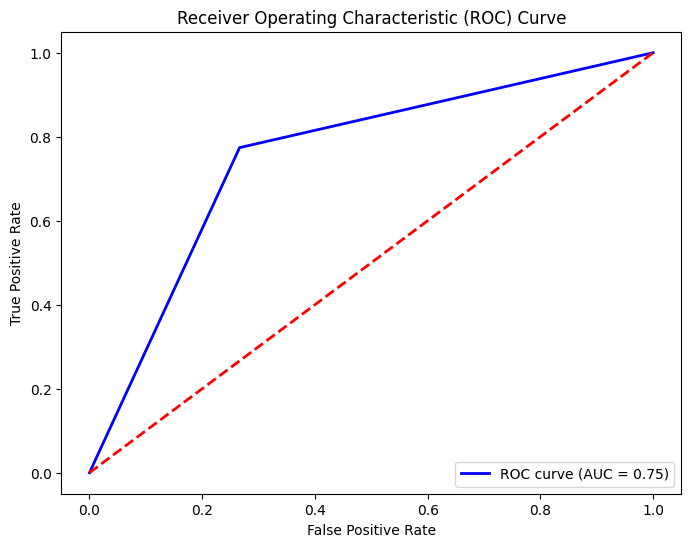

Confusion Matrix:
[[8017 2911]
 [ 322 1103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     10928
           1       0.27      0.77      0.41      1425

    accuracy                           0.74     12353
   macro avg       0.62      0.75      0.62     12353
weighted avg       0.88      0.74      0.78     12353



In [ ]:
apply_ML_algov3(X_train, y_train, X_test, y_test, BernoulliNB(class_prior=None), 'Class weightining(Algorithmic Method)')


In [ ]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |                 None                  |                              SVC()                               | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |


## Experiment no 10: GAN(whole_data)

In [ ]:
balanced_df = import_dataset(r'/content/balanced_dataset.xlsx')
balanced_df=dealing_with_duplicates(bank)

Number of duplicate rows in your data set: 10
All the duplicate rows have been deleted from data set


In [ ]:
X = balanced_df.drop('y', axis=1)
y = balanced_df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


value_counts = balanced_df['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 36526
Category value 1: Number of occurrences: 4639


In [ ]:
value_counts = bank['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 36526
Category value 1: Number of occurrences: 4639


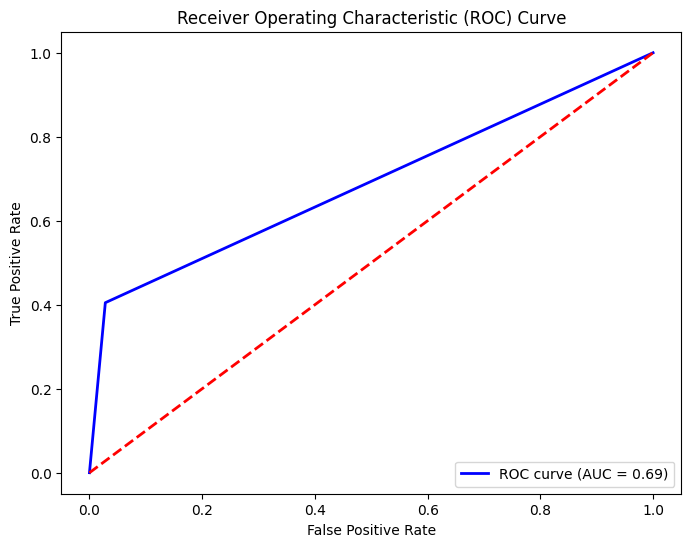

Confusion Matrix:
[[10670   309]
 [  816   555]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10979
           1       0.64      0.40      0.50      1371

    accuracy                           0.91     12350
   macro avg       0.79      0.69      0.72     12350
weighted avg       0.90      0.91      0.90     12350



In [ ]:
warnings.filterwarnings("ignore")





apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'GAN(whole_data)')

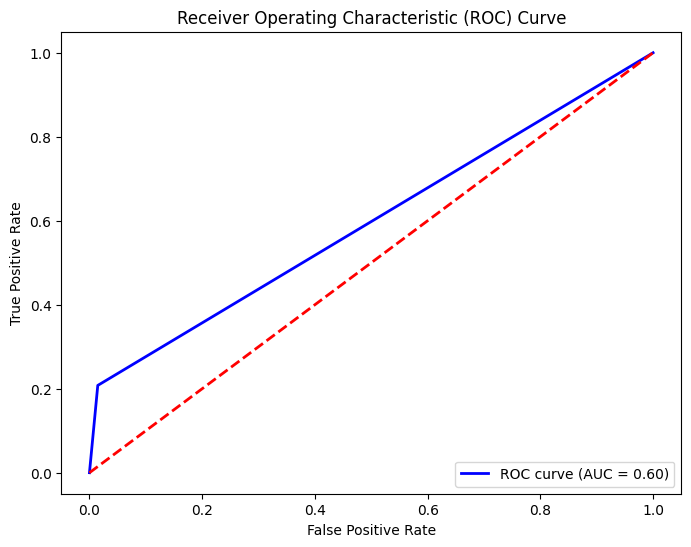

Confusion Matrix:
[[10817   162]
 [ 1086   285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10979
           1       0.64      0.21      0.31      1371

    accuracy                           0.90     12350
   macro avg       0.77      0.60      0.63     12350
weighted avg       0.88      0.90      0.88     12350



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'GAN(whole_data)')

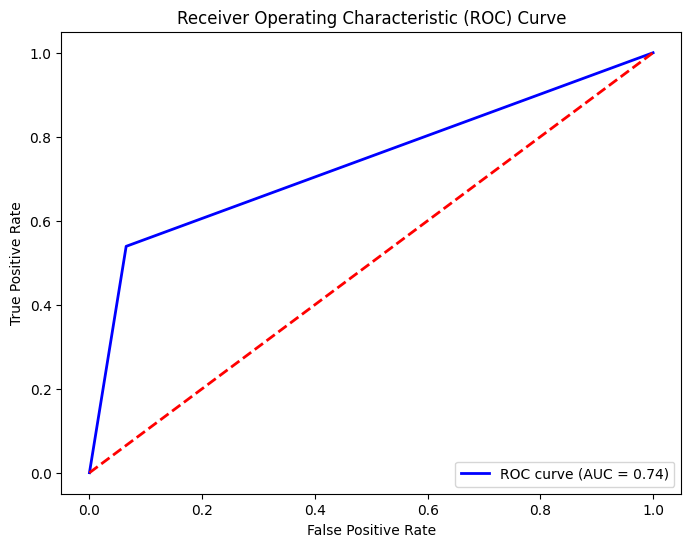

Confusion Matrix:
[[10264   715]
 [  632   739]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10979
           1       0.51      0.54      0.52      1371

    accuracy                           0.89     12350
   macro avg       0.73      0.74      0.73     12350
weighted avg       0.89      0.89      0.89     12350



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'GAN(whole_data)')

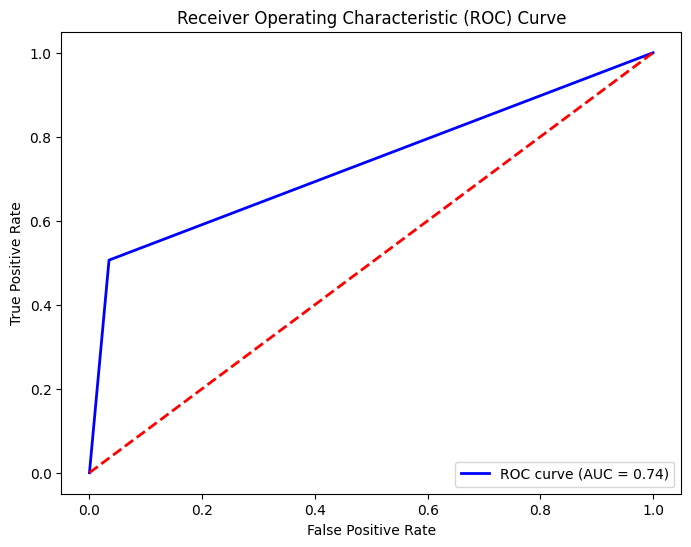

Confusion Matrix:
[[10598   381]
 [  677   694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10979
           1       0.65      0.51      0.57      1371

    accuracy                           0.91     12350
   macro avg       0.79      0.74      0.76     12350
weighted avg       0.91      0.91      0.91     12350



In [ ]:
apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'GAN(whole_data)')

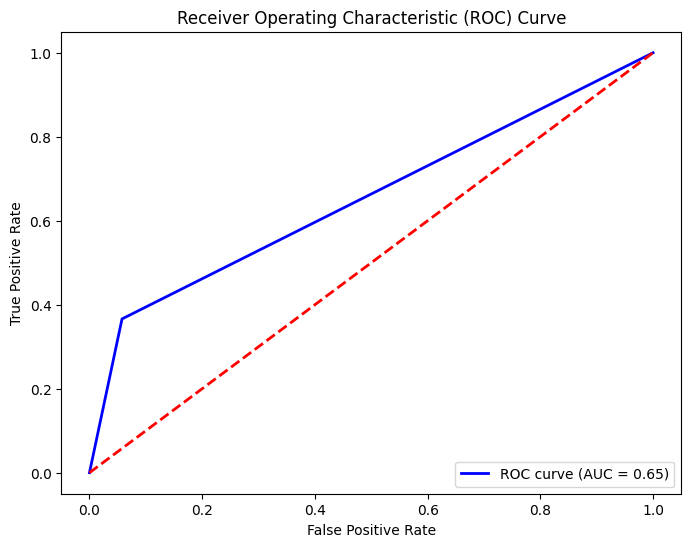

Confusion Matrix:
[[10345   634]
 [  869   502]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10979
           1       0.44      0.37      0.40      1371

    accuracy                           0.88     12350
   macro avg       0.68      0.65      0.67     12350
weighted avg       0.87      0.88      0.87     12350



In [ ]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'GAN(whole_data)')

In [ ]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876 | 0.690087976162955  |
| 1  |                 None                  |                              SVC()                               | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385 | 0.5970119891603093 |


## Experiment no 11:GAN(train_data)

In [ ]:
balanced_df_train=import_dataset(r'/content/balanced_dataset_train.xlsx')

In [ ]:

balanced_df_train=dealing_with_duplicates(balanced_df_train)
# Split dataset into train and test
X = balanced_df_train.drop('y', axis=1)
y = balanced_df_train['y']


value_counts = balanced_df_train['y'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Number of duplicate rows in your data set: 0
All the duplicate rows have been deleted from data set
Category value 0: Number of occurrences: 25605
Category value 1: Number of occurrences: 22394


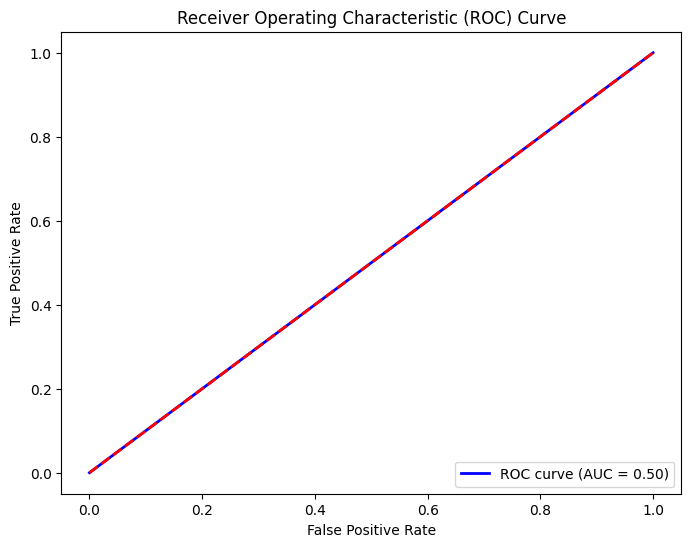

Confusion Matrix:
[[10928     0]
 [ 1425     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10928
           1       0.00      0.00      0.00      1425

    accuracy                           0.88     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.78      0.88      0.83     12353



In [ ]:
apply_ML_algov2(X, y, X1_test, y1_test, LogisticRegression(), 'GAN(train_data)')

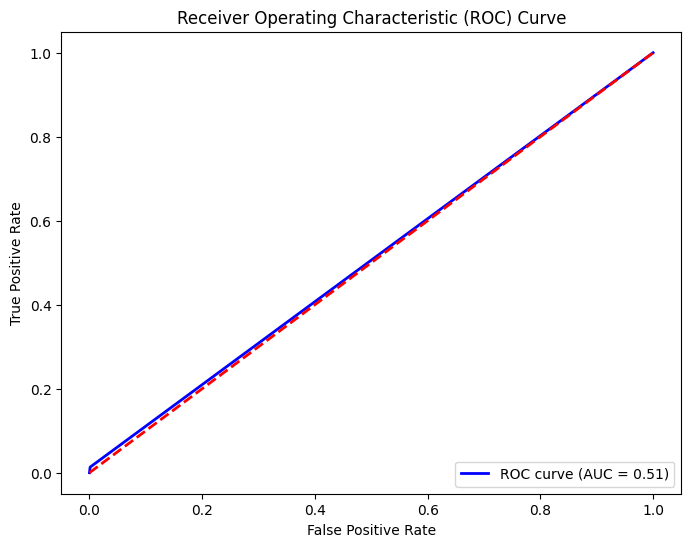

Confusion Matrix:
[[10915    13]
 [ 1406    19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10928
           1       0.59      0.01      0.03      1425

    accuracy                           0.89     12353
   macro avg       0.74      0.51      0.48     12353
weighted avg       0.85      0.89      0.83     12353



In [ ]:
apply_ML_algov2(X, y, X1_test, y1_test, SVC(), 'GAN(train_data)')


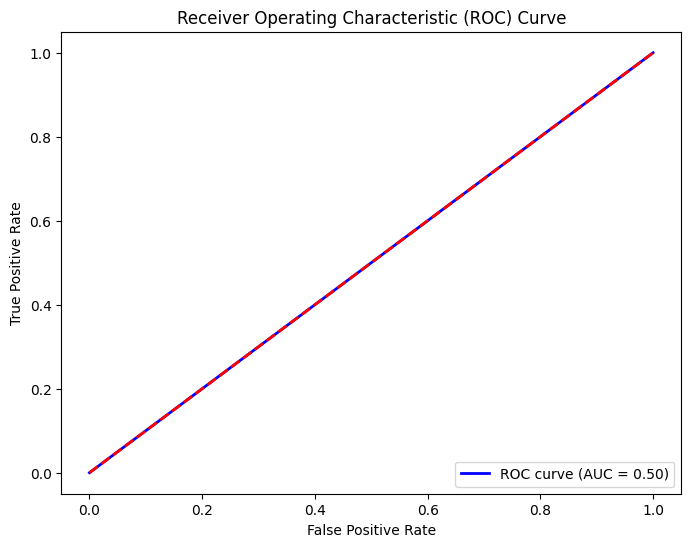

Confusion Matrix:
[[10928     0]
 [ 1425     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10928
           1       0.00      0.00      0.00      1425

    accuracy                           0.88     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.78      0.88      0.83     12353



In [ ]:
apply_ML_algov2(X, y, X1_test, y1_test, DecisionTreeClassifier(), 'GAN(train_data)')


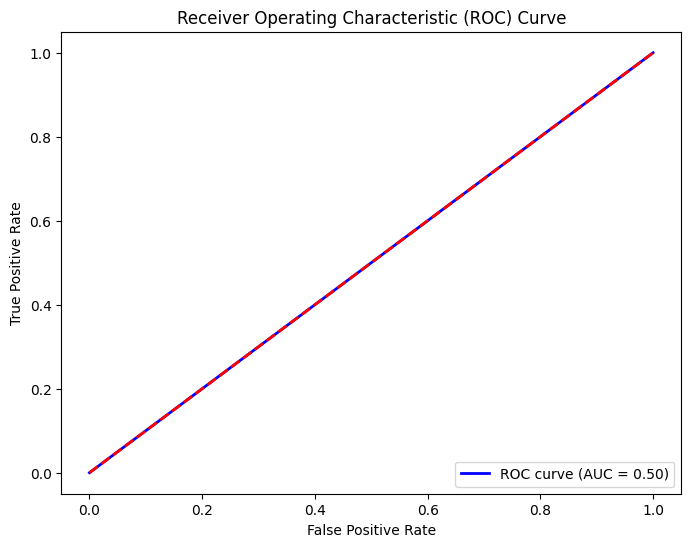

Confusion Matrix:
[[10928     0]
 [ 1425     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10928
           1       0.00      0.00      0.00      1425

    accuracy                           0.88     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.78      0.88      0.83     12353



In [ ]:
apply_ML_algov2(X, y, X1_test, y1_test, RandomForestClassifier(), 'GAN(train_data)')


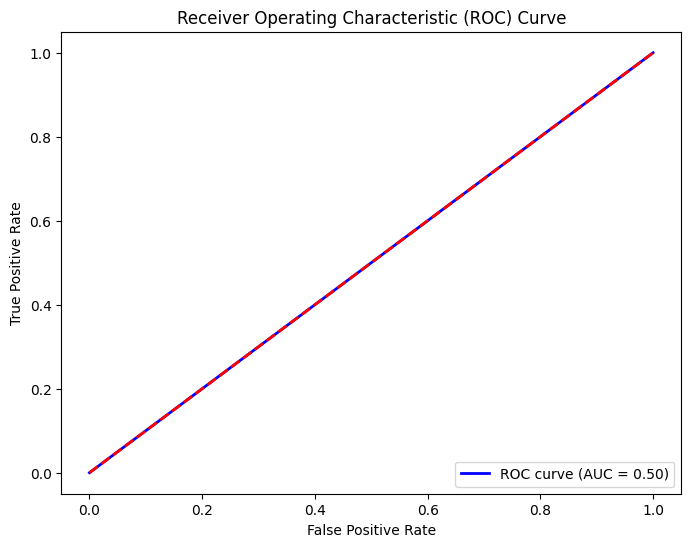

Confusion Matrix:
[[10928     0]
 [ 1425     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10928
           1       0.00      0.00      0.00      1425

    accuracy                           0.88     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.78      0.88      0.83     12353



In [ ]:
apply_ML_algov2(X, y, X1_test, y1_test, GaussianNB(), 'GAN(train_data)')


In [ ]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+----------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision      |        Recall        |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+----------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.9056909252813082 | 0.6431718061674009  | 0.40982456140350876  | 0.690087976162955  |
| 1  |                 None                  |                              SVC()                               | 0.8954100218570388 | 0.6436285097192225  | 0.20912280701754385  | 0.59701198916030

In [ ]:
results_df.to_csv('bank_results.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file
